# Detection of Real and Fake Job Postings using NLP and Machine Learning

### Problem Statement:

* Online job portals publish thousands of listings every day, but a fraction of them are **fraudulent or deceptive**, created to mislead or exploit job seekers.
* These **fake postings can cause financial loss, identity theft, and reduced trust in online recruitment** platforms.
* Therefore, **there is a need for an automated**, data-driven system capable of accurately identifying and preventing such fraudulent job advertisements.

### Data Collection:
- Dataset Author / Uploader	Shivam Bansal (Kaggle Contributor, 2018)
- Kaggle dataset --> https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction
- The data consists of 17 880 rows × 18 column

### Importing The Data & Required Libraries

In [1]:
# Import Libraries

import numpy as np                                                                    # numpy → used for numerical operations, arrays, handling missing values
import pandas as pd                                                                   # pandas → used for loading the dataset, cleaning data, handling dataframes
import matplotlib.pyplot as plt                                                       # matplotlib → used for basic plotting (bar plots, histograms, line plots)
import seaborn as sns                                                                 # seaborn → used for more advanced, beautiful visualizations (heatmaps, countplots)
import re                                                                             # regex → used to detect patterns in text (emails, phones, scam keywords)
import string                                                                         # string → helps remove punctuation from text columns
from sklearn.model_selection import train_test_split                                  # train_test_split → used later to split data into train and test sets
from sklearn.feature_extraction.text import TfidfVectorizer                           # TF-IDF → converts text columns into numerical vectors for ML models
from sklearn.preprocessing import LabelEncoder                                        # LabelEncoder → used if you need to convert categorical values into numeric
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score   # ML evaluation metrics → used for measuring model performance
from sklearn.linear_model import LogisticRegression                                   # Baseline ML model → simple and interpretable
from sklearn.naive_bayes import MultinomialNB                                         # Naive Bayes → works well on TF-IDF text data
from sklearn.ensemble import RandomForestClassifier                                   # RandomForest → powerful model for mixed structured + text features
from xgboost import XGBClassifier                                                     # XGBoost → high performance boosting model for best accuracy
import warnings
warnings.filterwarnings("ignore")                                                     # Ignore warnings → keeps the notebook clean when running code

### Import the CSV Data as Pandas DataFrame

In [2]:
# Load the dataset containing real & fake job postings

data = pd.read_csv(r"C:\MSc Data Science\Data Science Project\Notebook\Data\fake_job_postings.csv")

### Show Top 5 Rows

In [3]:
# Initial data exploration to understand the structure and content of the dataset

print("Top 5 Records:")
data.head()

Top 5 Records:


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


### Shape of the dataset

In [4]:
# Displays number of rows and columns

print("\nDataset Shape:") 
print(data.shape)


Dataset Shape:
(17880, 18)


### Job Dataset Feature Description Table
| **Sl** | **Feature**             | **Description**                                                                    |
| ------ | ----------------------- | ---------------------------------------------------------------------------------- |
| 1      | **job_id**              | A unique identifier for each job posting.                                          |
| 2      | **title**               | The title/name of the job position. *(Missing in your table)*                      |
| 3      | **location**            | The geographical location of the job.                                              |
| 4      | **department**          | The department or organizational unit the job belongs to.                          |
| 5      | **salary_range**        | The salary range for the job.                                                      |
| 6      | **company_profile**     | A brief description of the company.                                                |
| 7      | **description**         | The detailed job description.                                                      |
| 8      | **requirements**        | A list of required skills or qualifications for the job.                           |
| 9      | **benefits**            | The benefits offered by the company.                                               |
| 10     | **telecommuting**       | A binary variable indicating whether the job allows telecommuting (remote work).   |
| 11     | **has_company_logo**    | A binary variable indicating whether a company logo is present in the job posting. |
| 12     | **has_questions**       | A binary variable indicating whether the job posting includes screening questions. |
| 13     | **employment_type**     | The type of employment (e.g., Full-time, Part-time).                               |
| 14     | **required_experience** | The required experience level for the job.                                         |
| 15     | **required_education**  | The minimum required education for the job. *(Missing in your table)*              |
| 16     | **industry**            | The industry the job belongs to.                                                   |
| 17     | **function**            | The job function or role.                                                          |
| 18     | **fraudulent**          | Target variable — 0 for genuine and 1 for fake job posting.                        |


### Check Missing Values & Duplicates

In [5]:
# Count of columns with any missing data

print("\nNumber of Columns with Missing Values:")
print(data.isnull().any().sum())
 
#  MISSING VALUES TABLE
print("\nMissing Value count in each column : ")
missing = data.isna().sum().to_frame("missing_count")
missing["missing_percent"] = (data.isna().mean() * 100).round(2)
missing.sort_values("missing_percent", ascending=False)



Number of Columns with Missing Values:
12

Missing Value count in each column : 


,missing_count,missing_percent
salary_range,15012,83.96
department,11547,64.58
required_education,8105,45.33
benefits,7212,40.34
required_experience,7050,39.43
function,6455,36.10
industry,4903,27.42
employment_type,3471,19.41
company_profile,3308,18.50
requirements,2696,15.08


In [6]:
# Checks for exact duplicate rows

print("\nNumber of Duplicate Rows:")
print(data.duplicated().sum())



Number of Duplicate Rows:
0


### Check The Data Types

In [7]:
# Provides overview of each column's data type and missing values

print("\nData Types and Non-Null Counts:")
data.info()


Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry            

### Checking the number of unique values of each column

In [8]:
data.nunique()

job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11965
benefits                6203
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

### Check Statistics of Data Set

In [9]:
# Summary of statistics for numeric columns

print("\nDescriptive Statistics:")
print(data.describe())



Descriptive Statistics:
             job_id  telecommuting  has_company_logo  has_questions  \
count  17880.000000   17880.000000      17880.000000   17880.000000   
mean    8940.500000       0.042897          0.795302       0.491723   
std     5161.655742       0.202631          0.403492       0.499945   
min        1.000000       0.000000          0.000000       0.000000   
25%     4470.750000       0.000000          1.000000       0.000000   
50%     8940.500000       0.000000          1.000000       0.000000   
75%    13410.250000       0.000000          1.000000       1.000000   
max    17880.000000       1.000000          1.000000       1.000000   

         fraudulent  
count  17880.000000  
mean       0.048434  
std        0.214688  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  


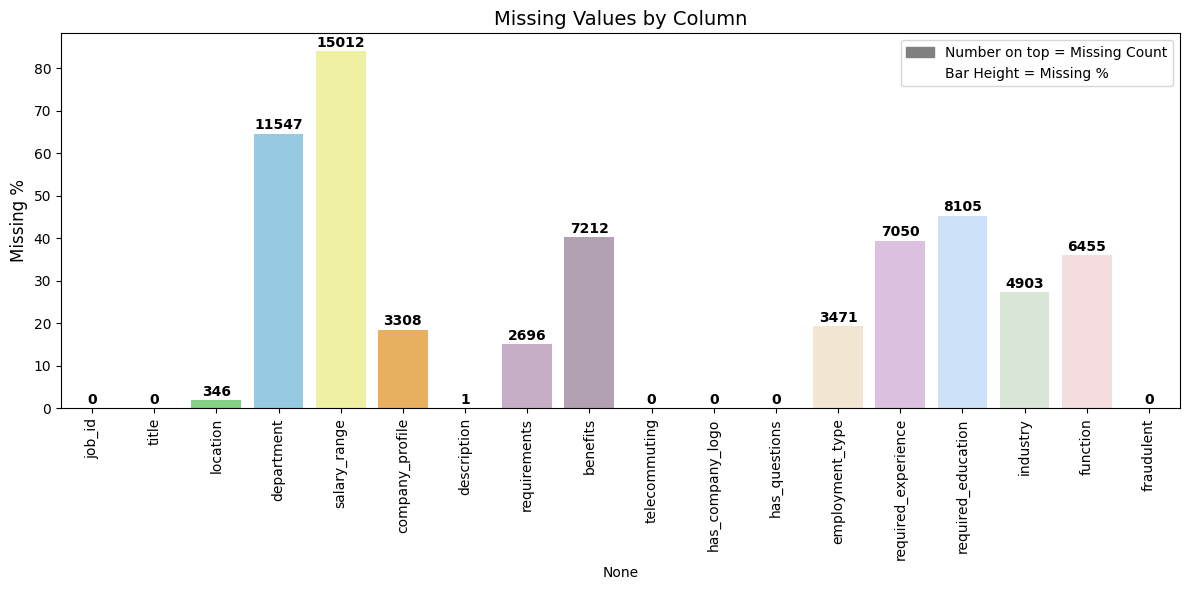

In [10]:
#  MISSING VALUES VISUALIZATION

# Custom multi-color palette
custom_colors = [
    "#FF6F91", "#6A5ACD", "#77DD77", "#89CFF0", "#FDFD96",
    "#FFB347", "#03C6C7", "#CBAACB", "#B39EB5", "#AEC6CF",
    "#FFD1DC", "#AFE1AF", "#F7E7CE", "#E0BBE4", "#C6E2FF",
    "#D5E8D4", "#FADADD", "#FFC0CB"
]

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=missing.index,
    y=missing["missing_percent"],
    palette=custom_colors
)


# Add missing COUNT label on top

for i, (index, row) in enumerate(missing.iterrows()):
    count = int(row["missing_count"])
    percent = row["missing_percent"]
    ax.text(
        i,                     # x position
        percent + 1,           # slightly above bar
        f"{count}",            # exact missing count
        ha='center', fontsize=10, fontweight='bold'
    )


# Add legend

import matplotlib.patches as mpatches
count_patch = mpatches.Patch(color="gray", label="Number on top = Missing Count")
percent_patch = mpatches.Patch(color="white", label="Bar Height = Missing %")
plt.legend(handles=[count_patch, percent_patch], loc="upper right")


# Style and labels

plt.xticks(rotation=90, fontsize=10)
plt.ylabel("Missing %", fontsize=12)
plt.title("Missing Values by Column", fontsize=14)
plt.tight_layout()
plt.show()


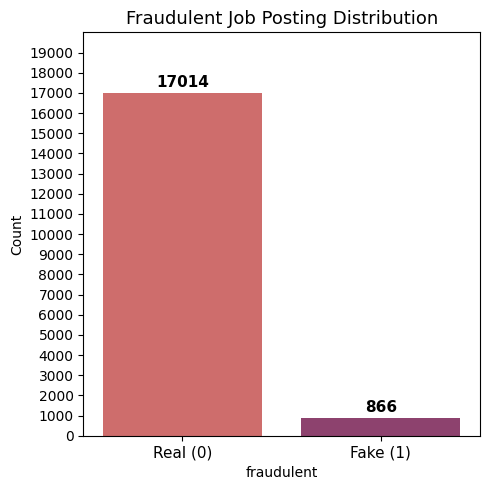

fraudulent
0    95.16
1     4.84
Name: count, dtype: float64

In [11]:
#  TARGET VARIABLE DISTRIBUTION (Custom Y-axis + Labels)

fraud_counts = data["fraudulent"].value_counts()

plt.figure(figsize=(5, 5))
ax = sns.barplot(
    x=fraud_counts.index,
    y=fraud_counts.values,
    palette="flare"
)

# Add count labels above each bar
for i, v in enumerate(fraud_counts.values):
    ax.text(i, v + 300, str(v), ha='center', fontsize=11, fontweight='bold')

# Custom Y-axis: 0 to 20000 with step of 1000
plt.yticks(range(0, 19001, 1000))
plt.ylim(0, 20000)

plt.xticks([0, 1], ["Real (0)", "Fake (1)"], fontsize=11)
plt.title("Fraudulent Job Posting Distribution", fontsize=13)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Print percentages
(fraud_counts / len(data) * 100).round(2)


# Moving to Text EDA on:

- company_profile
- description
- requirements
- benefits

In [13]:
"""
STEP 4.1: Creating word count features for all main text columns.

Why?
------
Fake job postings usually have very short and vague descriptions.
Real job postings are longer and more detailed.

What this cell does:
---------------------
- Fills missing text with empty string
- Converts text to string format
- Counts the number of words in each text column
- Adds new columns ending with "_wc" (word count)

New Columns Created:
---------------------
- company_profile_wc
- description_wc
- requirements_wc
- benefits_wc
"""

text_cols = ["company_profile", "description", "requirements", "benefits"]

for col in text_cols:
    data[f"{col}_wc"] = (
        data[col]
        .fillna("")
        .astype(str)
        .apply(lambda x: len(x.split()))
    )

data[[c for c in data.columns if c.endswith("_wc")]].head()


,company_profile_wc,description_wc,requirements_wc,benefits_wc
0,141,124,115,0
1,153,315,200,227
2,141,50,164,0
3,85,346,176,97
4,207,168,89,3


In [14]:
"""
STEP 4.2: Summary statistics of all word count columns.

Why?
------
This shows how long the text is in general.
It helps us understand:
- Minimum word count
- Average word count
- Maximum word count

This helps us quickly see if fake jobs have shorter texts.
"""

wc_cols = [c for c in data.columns if c.endswith("_wc")]

data[wc_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
company_profile_wc,17880.0,92.553579,85.487278,0.0,21.0,83.0,132.0,885.0
description_wc,17880.0,170.445973,123.304236,0.0,87.0,146.0,224.0,2115.0
requirements_wc,17880.0,78.022427,81.653370,0.0,19.0,62.0,108.0,1645.0
benefits_wc,17880.0,29.988311,49.756100,0.0,0.0,6.0,41.0,694.0


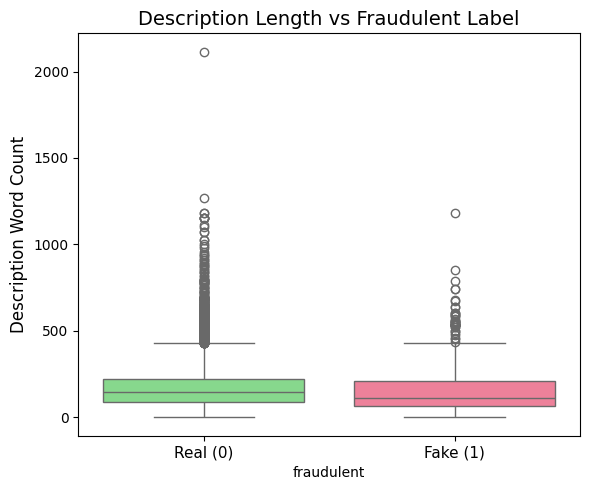

In [15]:
"""
STEP 4.4: Boxplot of description word counts for REAL vs FAKE jobs.

Why?
------
A boxplot helps visualize:
- how text length varies
- how fake descriptions tend to be shorter
- outliers in text length

This gives a visual confirmation of the pattern.
"""

plt.figure(figsize=(6, 5))
sns.boxplot(
    data=data,
    x="fraudulent",
    y="description_wc",
    palette=["#7AE582", "#FF6F91"]
)

plt.xticks([0, 1], ["Real (0)", "Fake (1)"], fontsize=11)
plt.ylabel("Description Word Count", fontsize=12)
plt.title("Description Length vs Fraudulent Label", fontsize=14)
plt.tight_layout()
plt.show()


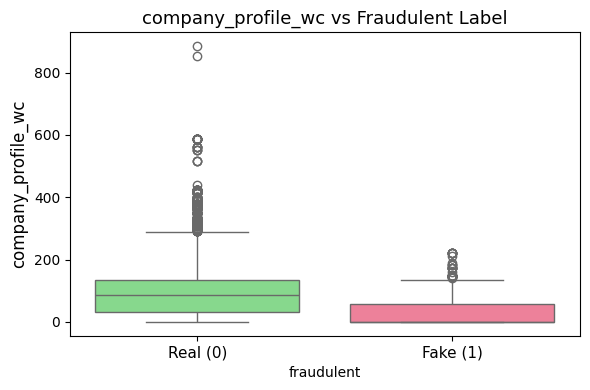

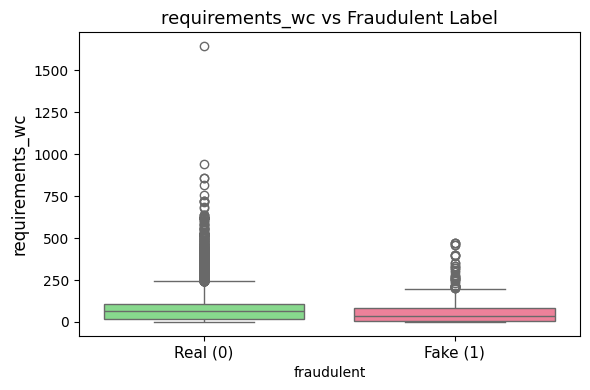

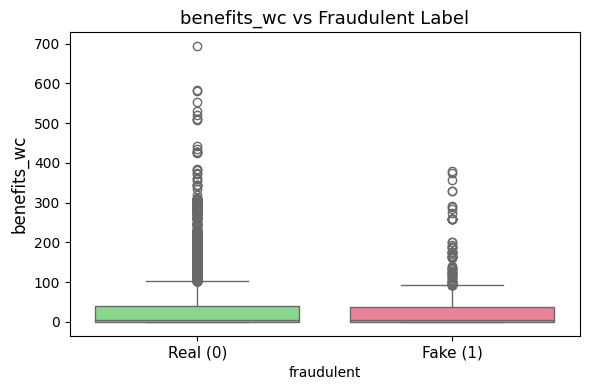

In [16]:
"""
STEP 4.5: Boxplots for all other text word count columns.

Why? (Optional)
----------------
This is to visually check if:
- company profiles,
- requirements,
- benefits

are also shorter in fake postings.
"""

for col in ["company_profile_wc", "requirements_wc", "benefits_wc"]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(
        data=data,
        x="fraudulent",
        y=col,
        palette=["#7AE582", "#FF6F91"]
    )
    plt.xticks([0, 1], ["Real (0)", "Fake (1)"], fontsize=11)
    plt.ylabel(col, fontsize=12)
    plt.title(f"{col} vs Fraudulent Label", fontsize=13)
    plt.tight_layout()
    plt.show()


### STEP 5 — TEXT MISSINGNESS ANALYSIS

In [17]:
"""
STEP 5.1: Check missing values in main text columns.

Why?
------
Fake job postings commonly hide important information.
These columns usually have many missing values in fake ads:
- company_profile
- requirements
- benefits

This cell creates a table showing how many values are missing.
"""

text_cols = ["company_profile", "description", "requirements", "benefits"]

missing_text = data[text_cols].isna().sum().to_frame("missing_count")
missing_text["missing_percent"] = (data[text_cols].isna().mean() * 100).round(2)

missing_text


,missing_count,missing_percent
company_profile,3308,18.50
description,1,0.01
requirements,2696,15.08
benefits,7212,40.34


In [18]:
"""
STEP 5.2: Compare missing text fields between REAL (0) and FAKE (1) jobs.

Why?
------
Missing data patterns are very useful in fraud detection.
Fake job postings:
- often skip company profiles
- often skip requirements
- rarely include real benefits

This comparison clearly shows the differences.
"""

data.groupby("fraudulent")[text_cols].apply(lambda x: x.isna().sum()).T


fraudulent,0,1
company_profile,2721,587
description,0,1
requirements,2542,154
benefits,6848,364


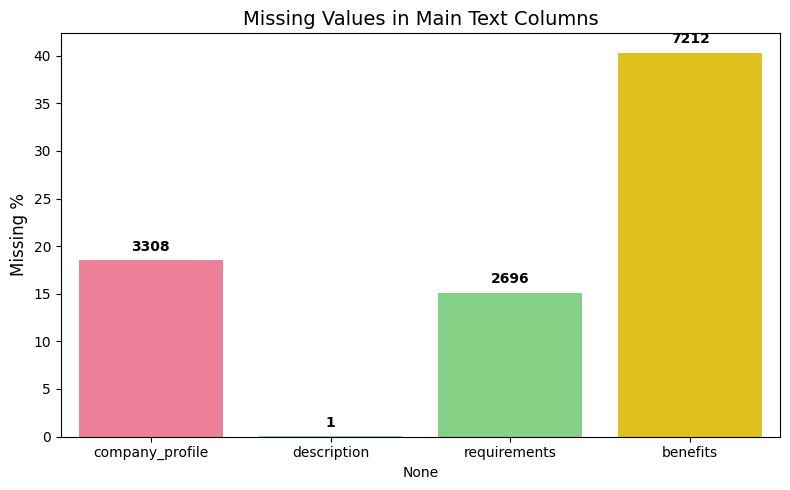

In [19]:
"""
STEP 5.3: Visualize missing values for text columns only.

Why?
------
A bar plot makes it visually easy to see which text fields
are missing more and how serious the missing problem is.
"""

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x=missing_text.index,
    y=missing_text["missing_percent"],
    palette=["#FF6F91", "#89CFF0", "#77DD77", "#FFD700"]   # beautiful colors
)

# Add missing counts above bars
for i, v in enumerate(missing_text["missing_count"]):
    ax.text(i, missing_text["missing_percent"][i] + 1, 
            f"{v}", ha='center', fontsize=10, fontweight='bold')

plt.ylabel("Missing %", fontsize=12)
plt.title("Missing Values in Main Text Columns", fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


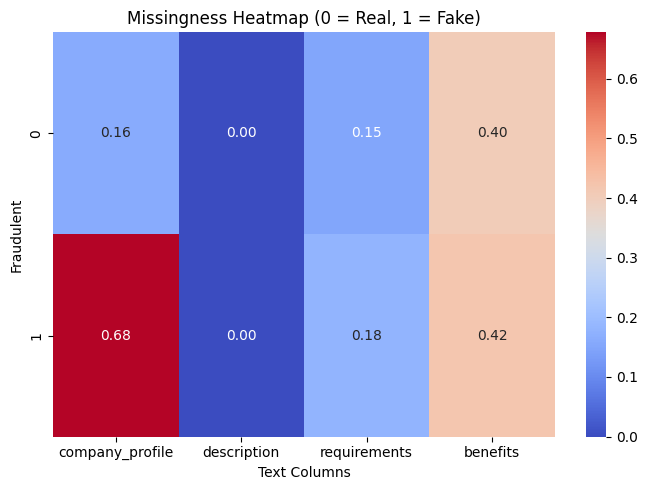

In [20]:
"""
STEP 5.4: Heatmap of missing values for REAL vs FAKE postings.

Why?
------
A heatmap shows visually which group has more missing text.
Fake postings generally show darker colors (more missing).
"""

# Create binary missing dataframe
missing_binary = data[text_cols].isna().astype(int)
missing_binary["fraudulent"] = data["fraudulent"]

plt.figure(figsize=(7, 5))
sns.heatmap(
    missing_binary.groupby("fraudulent").mean(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)

plt.title("Missingness Heatmap (0 = Real, 1 = Fake)")
plt.ylabel("Fraudulent")
plt.xlabel("Text Columns")
plt.tight_layout()
plt.show()


### STEP 6 — Scam Keyword Detection & Feature Creation

In [21]:
"""
STEP 6.1: Create a list of common scam-related keywords.

Why?
------
Fake job postings often include money-based, urgent, or
suspicious terms such as:
- earn money fast
- no experience needed
- work from home
- apply immediately
- quick income

This list is used to detect scam patterns in descriptions
and requirements.
"""

scam_keywords = [
    "earn", "income", "bonus", "cash", "commission", "daily", "quick",
    "urgent", "immediate", "no experience", "hiring now", "apply now",
    "work from home", "remote work", "flexible hours", "weekly payout",
    "instant", "vacancies", "guaranteed", "opportunity"
]


In [22]:
"""
STEP 6.2: Function to count scam keywords in a text column.

Why?
------
We search each job description and requirements field
to see if any of the scam keywords appear.
The count gives us a numerical feature for ML.
"""

import re

def count_scam_words(text):
    if pd.isna(text):
        return 0
    text = text.lower()
    return sum(text.count(word) for word in scam_keywords)


In [23]:
"""
STEP 6.3: Create the new feature 'scam_keyword_count'.

Why?
------
Fake job postings use many scam words.
Real job postings use almost none.
This creates a strong predictive feature.

We combine:
- description
- requirements
for maximum scam-word detection.
"""

data["scam_keyword_count"] = (
    data["description"].fillna("").apply(count_scam_words)
    +
    data["requirements"].fillna("").apply(count_scam_words)
)


In [24]:
"""
STEP 6.4: Basic stats for scam keyword count.

Why?
------
This helps us see the difference between real vs fake jobs.
More scam words = more likely fake posting.
"""

data["scam_keyword_count"].describe()


count    17880.000000
mean         1.243177
std          1.670300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         30.000000
Name: scam_keyword_count, dtype: float64

In [25]:
"""
STEP 6.5: Compare average scam keyword count for REAL vs FAKE jobs.

Why?
------
Fake jobs typically show higher values.
This confirms our pattern analysis.
"""

data.groupby("fraudulent")["scam_keyword_count"].mean().round(2)


fraudulent
0    1.23
1    1.51
Name: scam_keyword_count, dtype: float64

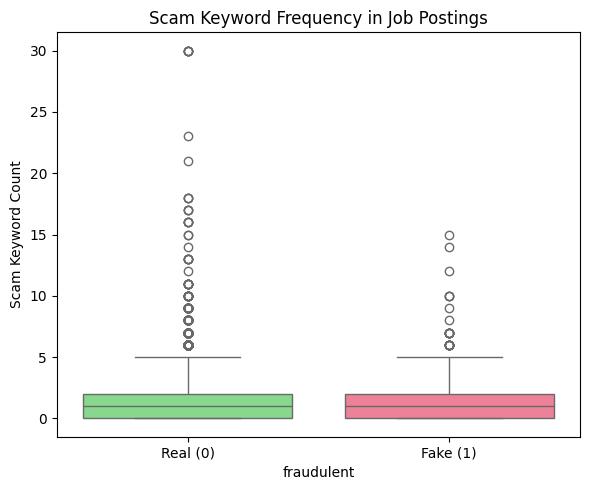

In [26]:
"""
STEP 6.6: Visualize scam keyword count for REAL vs FAKE.

Why?
------
A violin/box plot clearly shows how fake job postings
contain more scam-related terms.
"""

plt.figure(figsize=(6, 5))
sns.boxplot(
    data=data,
    x="fraudulent",
    y="scam_keyword_count",
    palette=["#7AE582", "#FF6F91"]
)

plt.xticks([0, 1], ["Real (0)", "Fake (1)"])
plt.ylabel("Scam Keyword Count")
plt.title("Scam Keyword Frequency in Job Postings")
plt.tight_layout()
plt.show()


### STEP 7 — Soft Skills vs Technical Skills

In [27]:
"""
STEP 7.1: Define lists of soft skills and technical skills.

Why?
------
Fake jobs usually highlight:
- honesty
- communication
- hardworking

Real jobs highlight:
- Python, SQL, Excel, Java
- domain tools like CRM, Hadoop

These lists allow us to identify the type of skills mentioned.
"""

soft_skills = [
    "honest", "hardworking", "communication", "team player", "positive",
    "attitude", "flexible", "interpersonal", "trustworthy", "motivated",
    "punctual", "dedicated", "self-motivated", "multitasking"
]

technical_skills = [
    "python", "sql", "excel", "java", "crm", "hadoop", "spark", "etl",
    "power bi", "tableau", "machine learning", "data analysis",
    "html", "css", "javascript", "database", "linux", "cloud"
]


In [28]:
"""
STEP 7.2: Function to count occurrences of soft/technical skills.

Why?
------
The function checks how many matching words appear
inside the text fields. This allows us to convert
skill presence into numerical counts.
"""

def count_skill_words(text, skill_list):
    if pd.isna(text):
        return 0
    text = text.lower()
    return sum(text.count(skill) for skill in skill_list)


In [29]:
"""
STEP 7.3: Calculate softskill_count and techskill_count.

Why?
------
Fake jobs → more soft skills
Real jobs → more technical skills

We analyze both:
- description
- requirements
for maximum skill detection.
"""

data["softskill_count"] = (
    data["description"].fillna("").apply(lambda x: count_skill_words(x, soft_skills)) +
    data["requirements"].fillna("").apply(lambda x: count_skill_words(x, soft_skills))
)

data["techskill_count"] = (
    data["description"].fillna("").apply(lambda x: count_skill_words(x, technical_skills)) +
    data["requirements"].fillna("").apply(lambda x: count_skill_words(x, technical_skills))
)


In [30]:
"""
STEP 7.4: Create the 'softskill_to_techskill_ratio' feature.

Why?
------
If soft skills > technical skills → job is more suspicious.
Fake postings often contain ONLY soft skills.

Formula:
softskill_count / (techskill_count + 1)
"""

data["softskill_to_techskill_ratio"] = (
    data["softskill_count"] / (data["techskill_count"] + 1)
)


In [31]:
"""
STEP 7.5: View summary statistics of skill counts and ratio.

This helps confirm differences between real vs fake.
"""

data[["softskill_count", "techskill_count", "softskill_to_techskill_ratio"]].describe()


,softskill_count,techskill_count,softskill_to_techskill_ratio
count,17880.000000,17880.000000,17880.000000
mean,1.394295,1.918512,0.709906
std,1.666672,2.908184,1.037261
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.333333
75%,2.000000,2.000000,1.000000
max,22.000000,46.000000,16.000000


In [32]:
"""
STEP 7.6: Compare softskill and techskill values between REAL vs FAKE jobs.

Why?
------
Fake jobs will show:
- higher softskill_count
- lower techskill_count
- high softskill_to_techskill_ratio
"""

data.groupby("fraudulent")[
    ["softskill_count", "techskill_count", "softskill_to_techskill_ratio"]
].mean().round(2)


,softskill_count,techskill_count,softskill_to_techskill_ratio
fraudulent,,,
0,1.40,1.97,0.70
1,1.32,0.96,0.82


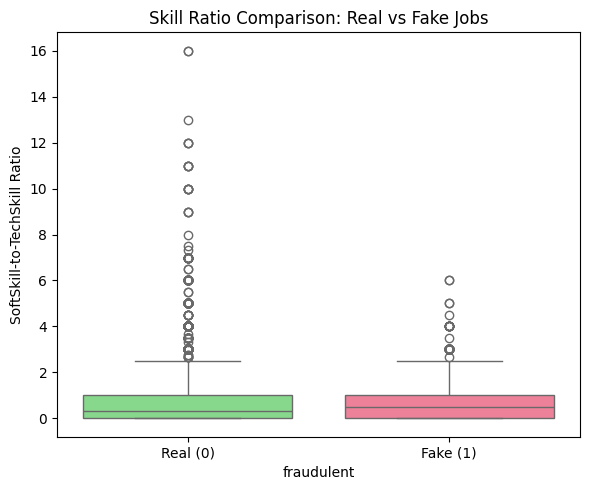

In [33]:
"""
STEP 7.7: Visualize the ratio for REAL vs FAKE jobs.

Why?
------
This plot clearly shows how fake postings rely more on soft skills
instead of real, measurable qualifications.
"""

plt.figure(figsize=(6, 5))
sns.boxplot(
    data=data,
    x="fraudulent",
    y="softskill_to_techskill_ratio",
    palette=["#7AE582", "#FF6F91"]
)

plt.xticks([0, 1], ["Real (0)", "Fake (1)"])
plt.ylabel("SoftSkill-to-TechSkill Ratio")
plt.title("Skill Ratio Comparison: Real vs Fake Jobs")
plt.tight_layout()
plt.show()


### STEP 8 — Contact Information Detection

In [34]:
"""
STEP 8.1: Define regular expression (regex) patterns for detecting contact info.

Why?
------
Scammers often include:
- Email ID (gmail/yahoo/outlook)
- Phone numbers (international formats)
- WhatsApp numbers
- Website URLs

Real job postings almost NEVER add personal contact info in the job description.

We will detect these patterns using regex.
"""

email_pattern = r"[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}"

phone_pattern = r"(\+?\d[\d\-\s]{7,}\d)"   # matches numbers like +44 7890 123456 or 987-654-3210

whatsapp_pattern = r"(whatsapp|wa\.me|whats app)"

url_pattern = r"(http[s]?://\S+|www\.\S+)"


In [35]:
"""
STEP 8.2: Function to check if text contains contact information.

Why?
------
If ANY pattern matches (email, phone, WhatsApp, or URL),
we return 1 → suspicious.

If nothing matches → 0 (safe).

We check both:
- description
- requirements

because scammers hide contact info anywhere.
"""

def contact_found(text):
    if pd.isna(text):
        return 0
    text = text.lower()
    
    if (re.search(email_pattern, text) or
        re.search(phone_pattern, text) or
        re.search(whatsapp_pattern, text) or
        re.search(url_pattern, text)):
        return 1
    return 0


In [36]:
"""
STEP 8.3: Create the new feature 'contact_info_present'.

Why?
------
If the job contains any external contact method,
it is highly suspicious and likely fake.

We check both description and requirements text.
"""

data["contact_info_present"] = (
    data["description"].apply(contact_found) |
    data["requirements"].apply(contact_found)
).astype(int)


In [37]:
"""
STEP 8.4: Check how many job postings contain contact information.

This helps us understand the frequency of this scam pattern.
"""

data["contact_info_present"].value_counts()


contact_info_present
0    15808
1     2072
Name: count, dtype: int64

In [38]:
"""
STEP 8.5: Compare contact info presence between REAL vs FAKE jobs.

Fake jobs will show MUCH higher values here.
"""

data.groupby("fraudulent")["contact_info_present"].mean().round(3)


fraudulent
0    0.115
1    0.130
Name: contact_info_present, dtype: float64

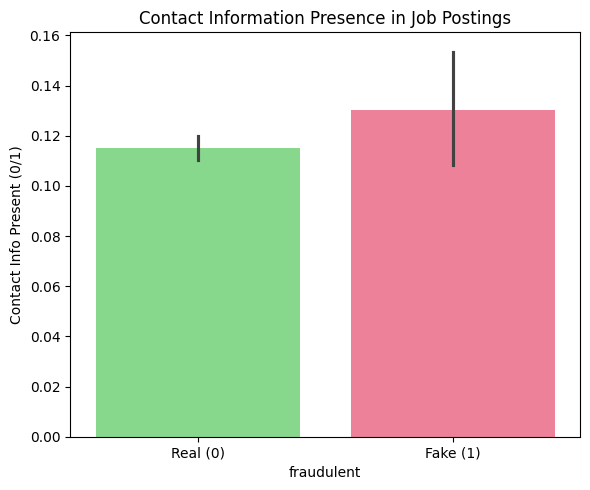

In [39]:
"""
STEP 8.6: Visualize presence of contact info for REAL vs FAKE.

A bar plot clearly shows how fake postings include emails,
phones, or URLs much more often than real postings.
"""

plt.figure(figsize=(6, 5))

sns.barplot(
    data=data,
    x="fraudulent",
    y="contact_info_present",
    palette=["#7AE582", "#FF6F91"]
)

plt.xticks([0, 1], ["Real (0)", "Fake (1)"])
plt.ylabel("Contact Info Present (0/1)")
plt.title("Contact Information Presence in Job Postings")
plt.tight_layout()
plt.show()


### STEP 9 — Text Richness Feature

In [40]:
"""
STEP 9.1: Create a combined Text Richness Score.

Why?
------
Fake job postings usually have very short and vague text.
Real job descriptions, requirements, and company profiles
are longer and more detailed.

We combine four word count features into one score:
- company_profile_wc
- description_wc
- requirements_wc
- benefits_wc

Higher score = richer text = more likely real
Lower score = vague/empty text = more likely fake
"""

data["text_richness_score"] = (
    data["company_profile_wc"] +
    data["description_wc"] +
    data["requirements_wc"] +
    data["benefits_wc"]
)


In [41]:
"""
STEP 9.2: Summary of the text richness scores.

This helps us understand:
- average richness
- minimum and maximum text detail
- overall distribution
"""

data["text_richness_score"].describe()


count    17880.000000
mean       371.010291
std        207.632995
min          0.000000
25%        225.000000
50%        346.000000
75%        488.000000
max       2115.000000
Name: text_richness_score, dtype: float64

In [42]:
"""
STEP 9.3: Compare text richness for REAL vs FAKE job postings.

Why?
------
Fake job postings usually have short text → low richness.
Real job postings usually have detailed text → high richness.

This comparison will make that trend very clear.
"""

data.groupby("fraudulent")["text_richness_score"].mean().round(1)


fraudulent
0    375.7
1    278.3
Name: text_richness_score, dtype: float64

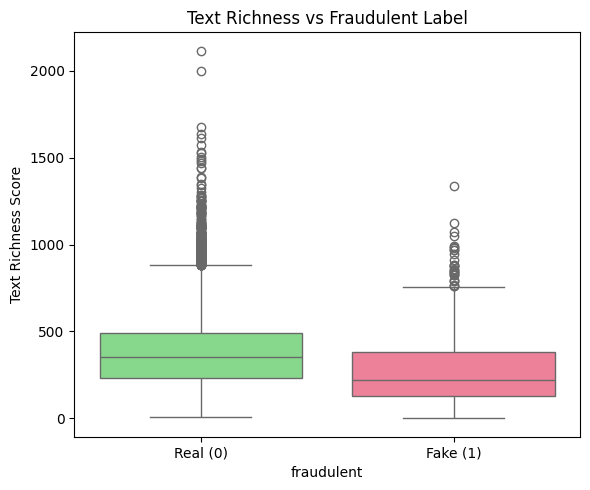

In [43]:
"""
STEP 9.4: Visualize text richness for REAL vs FAKE jobs.

Why?
------
A boxplot helps to visually compare richness between classes.
Fake job postings should cluster towards lower values.
"""

plt.figure(figsize=(6, 5))
sns.boxplot(
    data=data,
    x="fraudulent",
    y="text_richness_score",
    palette=["#7AE582", "#FF6F91"]
)

plt.xticks([0, 1], ["Real (0)", "Fake (1)"])
plt.ylabel("Text Richness Score")
plt.title("Text Richness vs Fraudulent Label")
plt.tight_layout()
plt.show()


In [44]:
"""
STEP 9.5 (Optional): Create a flag for LOW text richness.

Why?
------
Posts below a certain threshold are very likely fake.
This helps create a simple binary ML feature.

Threshold idea:
- < 50 words combined = suspicious posting
"""

data["low_richness_flag"] = (data["text_richness_score"] < 50).astype(int)


### STEP 10 — Missing Fields Count Feature

In [45]:
"""
STEP 10.1: Select important columns where missing values are suspicious.

Why?
------
Fake job postings usually hide important details such as:
- salary_range
- company_profile
- requirements
- benefits
- industry
- employment_type
- required_education
- required_experience

Real job postings usually provide these clearly.

We will count how many of these fields are missing for each posting.
"""

important_cols = [
    "company_profile",
    "description",
    "requirements",
    "benefits",
    "salary_range",
    "employment_type",
    "required_experience",
    "required_education",
    "industry",
    "function"
]


In [46]:
"""
STEP 10.2: Create 'missing_fields_count' feature.

Why?
------
This feature counts how many important fields are empty (NaN).
Fake postings tend to have multiple missing fields.
Real postings have far fewer missing values.

Higher count → more suspicious
Lower count → more genuine
"""

data["missing_fields_count"] = data[important_cols].isna().sum(axis=1)


In [47]:
"""
STEP 10.3: Check summary statistics for missing_fields_count.

Why?
------
This helps us understand:
- average number of missing fields
- minimum and maximum
- distribution patterns
"""

data["missing_fields_count"].describe()


count    17880.000000
mean         3.255761
std          2.414132
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max         10.000000
Name: missing_fields_count, dtype: float64

In [48]:
"""
STEP 10.4: Compare missing fields for REAL vs FAKE job postings.

Why?
------
Fake job postings usually have more missing fields.
Real job postings provide more detailed information.

This comparison will show a clear difference.
"""

data.groupby("fraudulent")["missing_fields_count"].mean().round(2)


fraudulent
0    3.22
1    4.03
Name: missing_fields_count, dtype: float64

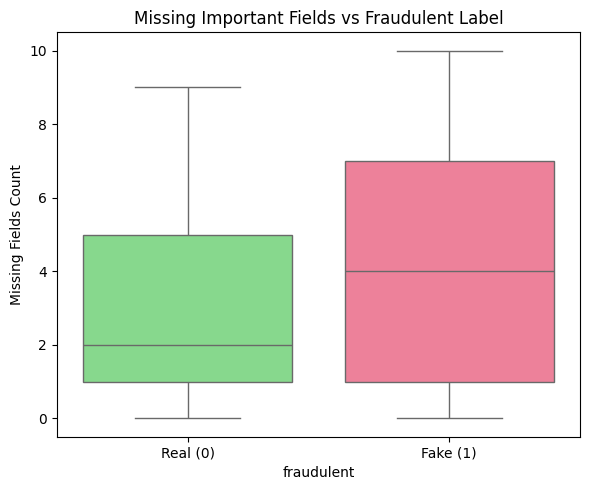

In [49]:
"""
STEP 10.5: Visualize missing fields for REAL vs FAKE.

Why?
------
This boxplot makes it visually clear that fake job postings
have more missing important information.
"""

plt.figure(figsize=(6, 5))
sns.boxplot(
    data=data,
    x="fraudulent",
    y="missing_fields_count",
    palette=["#7AE582", "#FF6F91"]
)

plt.xticks([0, 1], ["Real (0)", "Fake (1)"])
plt.ylabel("Missing Fields Count")
plt.title("Missing Important Fields vs Fraudulent Label")
plt.tight_layout()
plt.show()


In [50]:
"""
STEP 10.6 (Optional): Create a binary flag for HIGH missing fields.

Why?
------
Posts missing 5 or more important fields are very likely fake.

This creates an easy 0/1 feature for ML.
"""

data["high_missing_flag"] = (data["missing_fields_count"] >= 5).astype(int)


### STEP 11 — Grammar Noise & Uppercase Ratio Features

In [51]:
"""
STEP 11.1: Function to calculate punctuation noise.

Why?
------
Fake job postings often contain:
- too many exclamation marks (!!!)
- question marks (???)
- random punctuation patterns
- sloppy writing behavior

We count noisy punctuation:
- '!'
- '?'
- repeated punctuation like '!!', '??', '...'
"""

def punctuation_noise(text):
    if pd.isna(text):
        return 0
    return (
        text.count("!") +
        text.count("?") +
        text.count("..") +
        text.count("...") +
        text.count("!!") +
        text.count("??")
    )


In [52]:
"""
STEP 11.2: Create 'punctuation_noise_score'.

Why?
------
Fake postings often have:
- emotional tone
- urgent tone
- poor formatting

This feature helps detect messy/scam-like writing.
"""

data["punctuation_noise_score"] = (
    data["description"].fillna("").apply(punctuation_noise) +
    data["requirements"].fillna("").apply(punctuation_noise)
)


In [53]:
"""
STEP 11.3: Create 'uppercase_ratio'.

Why?
------
Fake job postings sometimes use:
- SHOUTING TEXT
- FULL CAPS TITLES
- Phrases like "EARN MONEY FAST"

Uppercase ratio = (# of uppercase letters) / (total letters + 1)
"""

def uppercase_ratio(text):
    if pd.isna(text):
        return 0
    letters = [c for c in text if c.isalpha()]
    if len(letters) == 0:
        return 0
    uppercase = [c for c in letters if c.isupper()]
    return len(uppercase) / len(letters)

# Apply to description only (best signal)
data["uppercase_ratio"] = data["description"].apply(uppercase_ratio)


In [54]:
"""
STEP 11.4 (Optional): Flag jobs with excessive exclamation marks.

Why?
------
Many scam job ads use a lot of '!' for emotional selling.
This creates a simple binary indication.
"""

data["excess_exclamation_flag"] = (
    data["description"].fillna("").apply(lambda x: 1 if x.count("!") >= 3 else 0)
)


In [55]:
"""
STEP 11.5: Summary of grammar noise features.

This helps to understand:
- how noisy the text is
- how uppercase-heavy the writing is
"""

data[["punctuation_noise_score", "uppercase_ratio", "excess_exclamation_flag"]].describe()


,punctuation_noise_score,uppercase_ratio,excess_exclamation_flag
count,17880.000000,17880.000000,17880.000000
mean,0.807718,0.043436,0.027908
std,1.962723,0.042342,0.164715
min,0.000000,0.000000,0.000000
25%,0.000000,0.024307,0.000000
50%,0.000000,0.033670,0.000000
75%,1.000000,0.049161,0.000000
max,44.000000,1.000000,1.000000


In [56]:
"""
STEP 11.6: Compare grammar noise features between REAL vs FAKE.

Why?
------
Fake postings generally show:
- More punctuation noise
- Higher uppercase ratio
- More exclamation marks

Real postings are more formal and structured.
"""

data.groupby("fraudulent")[
    ["punctuation_noise_score", "uppercase_ratio", "excess_exclamation_flag"]
].mean().round(3)


,punctuation_noise_score,uppercase_ratio,excess_exclamation_flag
fraudulent,,,
0,0.820,0.043,0.029
1,0.558,0.053,0.015


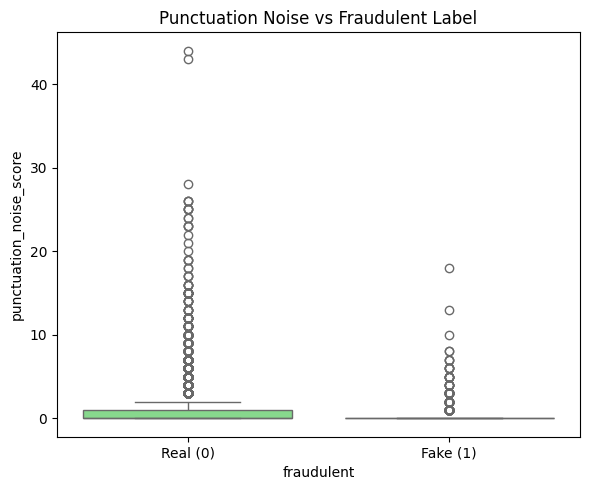

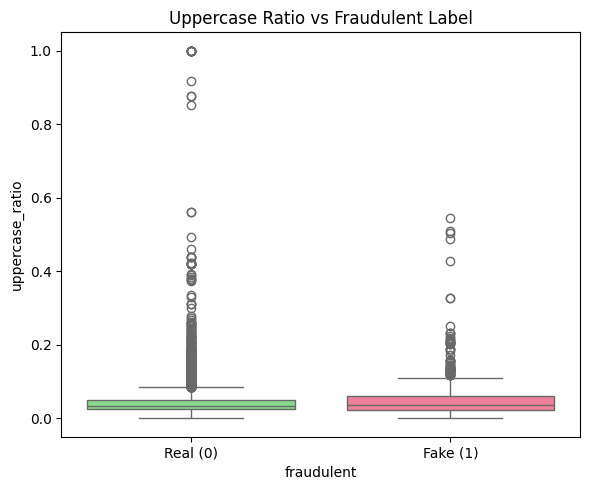

In [57]:
"""
STEP 11.7: Visualize grammar noise differences (REAL vs FAKE).

These boxplots show how fake postings tend to be more noisy.
"""

plt.figure(figsize=(6, 5))
sns.boxplot(
    data=data,
    x="fraudulent",
    y="punctuation_noise_score",
    palette=["#7AE582", "#FF6F91"]
)
plt.xticks([0, 1], ["Real (0)", "Fake (1)"])
plt.title("Punctuation Noise vs Fraudulent Label")
plt.tight_layout()
plt.show()


plt.figure(figsize=(6, 5))
sns.boxplot(
    data=data,
    x="fraudulent",
    y="uppercase_ratio",
    palette=["#7AE582", "#FF6F91"]
)
plt.xticks([0, 1], ["Real (0)", "Fake (1)"])
plt.title("Uppercase Ratio vs Fraudulent Label")
plt.tight_layout()
plt.show()


### STEP 12 — Vocabulary Complexity & Lexical Diversity Features

In [58]:
"""
STEP 12.1: Calculate vocabulary complexity & diversity features.

Why?
------
Fake job descriptions are usually:
- repetitive
- simple
- copy-paste text
- fewer unique words

Real job descriptions:
- use richer vocabulary
- have more unique words
- are more detailed

This function extracts 4 features:
1. total_words
2. unique_words
3. type_token_ratio (unique/total)
4. avg_word_length
"""

import string

def text_complexity_stats(text):
    if pd.isna(text):
        return pd.Series({
            "total_words": 0,
            "unique_words": 0,
            "type_token_ratio": 0.0,
            "avg_word_length": 0.0
        })
    
    # Clean text
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))

    words = text.split()
    
    if len(words) == 0:
        return pd.Series({
            "total_words": 0,
            "unique_words": 0,
            "type_token_ratio": 0.0,
            "avg_word_length": 0.0
        })
    
    unique_words = set(words)
    total_words = len(words)
    avg_word_length = sum(len(w) for w in words) / total_words

    return pd.Series({
        "total_words": total_words,
        "unique_words": len(unique_words),
        "type_token_ratio": len(unique_words) / total_words,
        "avg_word_length": avg_word_length
    })


In [59]:
"""
STEP 12.2: Apply complexity stats to 'description' column.

Why?
------
Description is the main text in the job posting.
Its vocabulary and structure reveal whether the job
is real or fake.

This will create 4 new columns:
- desc_total_words
- desc_unique_words
- desc_ttr (type-token ratio)
- desc_avg_word_len
"""

desc_stats = data["description"].apply(text_complexity_stats)

data["desc_total_words"] = desc_stats["total_words"]
data["desc_unique_words"] = desc_stats["unique_words"]
data["desc_ttr"] = desc_stats["type_token_ratio"]
data["desc_avg_word_len"] = desc_stats["avg_word_length"]


In [60]:
"""
STEP 12.3: Summary of vocabulary complexity features.

Helps us understand:
- average word count
- vocabulary richness
- text density
"""

data[[
    "desc_total_words",
    "desc_unique_words",
    "desc_ttr",
    "desc_avg_word_len"
]].describe()


,desc_total_words,desc_unique_words,desc_ttr,desc_avg_word_len
count,17880.000000,17880.000000,17880.000000,17880.000000
mean,169.817226,109.160962,0.704871,6.094273
std,123.076987,63.601436,0.114274,1.218902
min,0.000000,0.000000,0.000000,0.000000
25%,87.000000,64.000000,0.626489,5.401502
50%,145.000000,98.000000,0.689655,5.906977
75%,224.000000,142.000000,0.767442,6.469340
max,2115.000000,523.000000,1.000000,28.592920


In [61]:
"""
STEP 12.4: Compare complexity features for REAL vs FAKE postings.

Why?
------
Real postings → richer vocabulary
Fake postings → repetitive & simple text

This comparison will show clear differences.
"""

data.groupby("fraudulent")[
    ["desc_total_words", "desc_unique_words", "desc_ttr", "desc_avg_word_len"]
].mean().round(3)


,desc_total_words,desc_unique_words,desc_ttr,desc_avg_word_len
fraudulent,,,,
0,170.442,109.567,0.704,6.096
1,157.542,101.181,0.729,6.068


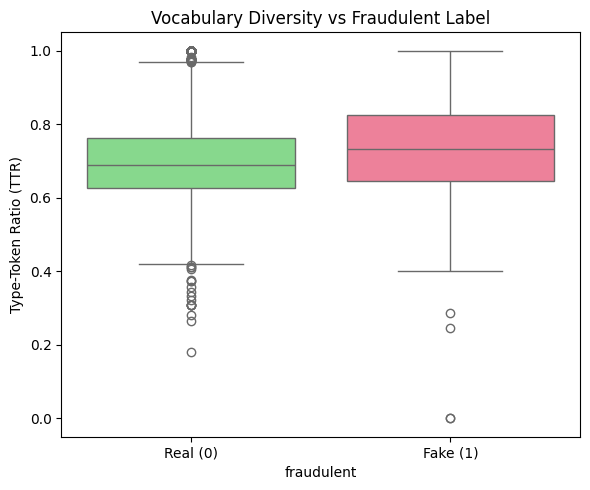

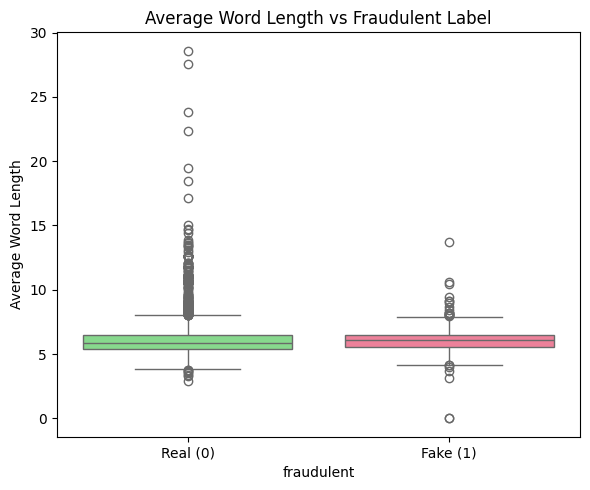

In [62]:
"""
STEP 12.5: Visualize vocabulary diversity using boxplots.

Why?
------
Shows how fake postings differ in complexity:
- lower TTR (less unique words)
- lower avg word length
- shorter descriptions
"""

plt.figure(figsize=(6, 5))
sns.boxplot(
    data=data,
    x="fraudulent",
    y="desc_ttr",
    palette=["#7AE582", "#FF6F91"]
)
plt.xticks([0, 1], ["Real (0)", "Fake (1)"])
plt.ylabel("Type-Token Ratio (TTR)")
plt.title("Vocabulary Diversity vs Fraudulent Label")
plt.tight_layout()
plt.show()


plt.figure(figsize=(6, 5))
sns.boxplot(
    data=data,
    x="fraudulent",
    y="desc_avg_word_len",
    palette=["#7AE582", "#FF6F91"]
)
plt.xticks([0, 1], ["Real (0)", "Fake (1)"])
plt.ylabel("Average Word Length")
plt.title("Average Word Length vs Fraudulent Label")
plt.tight_layout()
plt.show()


### STEP 13 — Combine Engineered Features + Correlation Heatmap

In [63]:
"""
STEP 13.1: Combine all engineered features into one list.

Why?
------
We have created many strong features from Steps 4–12.
Before modeling, we need to:
1. Gather them in one place
2. Check correlations
3. Prepare a cleaner ML dataset

This list will be used for heatmaps and future modeling.
"""

engineered_features = [
    # Step 4: Word counts
    "company_profile_wc", "description_wc", "requirements_wc", "benefits_wc",

    # Step 6: Scam keywords
    "scam_keyword_count",

    # Step 7: Skills
    "softskill_count", "techskill_count", "softskill_to_techskill_ratio",

    # Step 8: Contact info
    "contact_info_present",

    # Step 9: Text richness
    "text_richness_score", "low_richness_flag",

    # Step 10: Missing fields
    "missing_fields_count", "high_missing_flag",

    # Step 11: Grammar noise
    "punctuation_noise_score", "uppercase_ratio", "excess_exclamation_flag",

    # Step 12: Vocabulary complexity
    "desc_total_words", "desc_unique_words", "desc_ttr", "desc_avg_word_len",

    # Target
    "fraudulent"
]


In [64]:
"""
STEP 13.2: Create a new dataframe containing only engineered features.

Why?
------
This helps:
- reduce complexity
- visualize relationships
- prepare clean ML input later
"""

feature_data = data[engineered_features]
feature_data.head()


,company_profile_wc,description_wc,requirements_wc,benefits_wc,scam_keyword_count,softskill_count,techskill_count,softskill_to_techskill_ratio,contact_info_present,text_richness_score,...,missing_fields_count,high_missing_flag,punctuation_noise_score,uppercase_ratio,excess_exclamation_flag,desc_total_words,desc_unique_words,desc_ttr,desc_avg_word_len,fraudulent
0,141,124,115,0,0,1,1,0.50,0,380,...,4,0,1,0.034574,0,124.0,89.0,0.717742,6.112903,0
1,153,315,200,227,5,6,7,0.75,1,895,...,2,0,11,0.039634,1,310.0,183.0,0.590323,5.500000,0
2,141,50,164,0,7,0,0,0.00,0,355,...,7,1,0,0.023411,0,50.0,42.0,0.840000,5.980000,0
3,85,346,176,97,1,6,3,1.50,0,704,...,1,0,0,0.035294,0,346.0,204.0,0.589595,6.410405,0
4,207,168,89,3,1,2,0,2.00,0,467,...,1,0,0,0.109845,0,168.0,115.0,0.684524,7.333333,0


In [65]:
"""
STEP 13.3: Compute correlation matrix for all engineered features.

Why?
------
We want to understand:
- which features are strongly related to fraud
- which features correlate with each other
- redundancy or strength of signals

This is essential before ML modeling.
"""

corr_matrix = feature_data.corr()
corr_matrix


,company_profile_wc,description_wc,requirements_wc,benefits_wc,scam_keyword_count,softskill_count,techskill_count,softskill_to_techskill_ratio,contact_info_present,text_richness_score,...,missing_fields_count,high_missing_flag,punctuation_noise_score,uppercase_ratio,excess_exclamation_flag,desc_total_words,desc_unique_words,desc_ttr,desc_avg_word_len,fraudulent
company_profile_wc,1.000000,0.139936,0.197110,0.166687,0.096240,0.096481,0.054593,0.072664,-0.107035,0.612284,...,-0.194170,-0.137155,0.047903,-0.133212,0.030847,0.141231,0.150064,-0.183679,-0.166401,-0.160579
description_wc,0.139936,1.000000,0.091666,0.093918,0.378967,0.334789,0.098518,0.215738,-0.001168,0.710026,...,-0.049154,-0.041321,0.241965,-0.175894,0.179613,0.999922,0.975405,-0.748247,-0.171245,-0.021404
requirements_wc,0.197110,0.091666,1.000000,0.164712,0.112437,0.230777,0.191002,0.108206,-0.062952,0.568320,...,-0.179087,-0.117190,-0.017033,-0.113852,-0.042411,0.092624,0.089485,-0.148399,-0.113665,-0.054197
benefits_wc,0.166687,0.093918,0.164712,1.000000,0.055409,0.044566,0.078934,0.022353,-0.024596,0.428812,...,-0.257460,-0.169912,0.045061,-0.084769,-0.005393,0.094509,0.109727,-0.151790,-0.136521,-0.002434
scam_keyword_count,0.096240,0.378967,0.112437,0.055409,1.000000,0.147544,0.002583,0.112028,-0.017665,0.322171,...,-0.002678,0.013155,0.189258,-0.031364,0.150573,0.378791,0.356252,-0.279677,-0.157537,0.036406
softskill_count,0.096481,0.334789,0.230777,0.044566,0.147544,1.000000,0.060242,0.772725,-0.043087,0.339975,...,-0.117409,-0.106730,0.036378,-0.118311,0.042632,0.335224,0.338402,-0.258567,-0.029513,-0.010545
techskill_count,0.054593,0.098518,0.191002,0.078934,0.002583,0.060242,1.000000,-0.224632,0.033217,0.175011,...,-0.085740,-0.078300,-0.014063,0.001348,-0.022691,0.098413,0.107996,-0.088260,-0.019796,-0.074035
softskill_to_techskill_ratio,0.072664,0.215738,0.108206,0.022353,0.112028,0.772725,-0.224632,1.000000,-0.051244,0.205944,...,-0.083673,-0.067205,0.044919,-0.090745,0.054770,0.215971,0.218790,-0.182963,-0.052303,0.023632
contact_info_present,-0.107035,-0.001168,-0.062952,-0.024596,-0.017665,-0.043087,0.033217,-0.051244,1.000000,-0.075413,...,-0.020334,-0.073874,0.045440,0.168777,-0.010424,-0.002536,-0.003499,0.178165,0.419684,0.010292
text_richness_score,0.612284,0.710026,0.568320,0.428812,0.322171,0.339975,0.175011,0.205944,-0.075413,1.000000,...,-0.241258,-0.167811,0.167515,-0.224389,0.101394,0.711031,0.702521,-0.614709,-0.247621,-0.100722


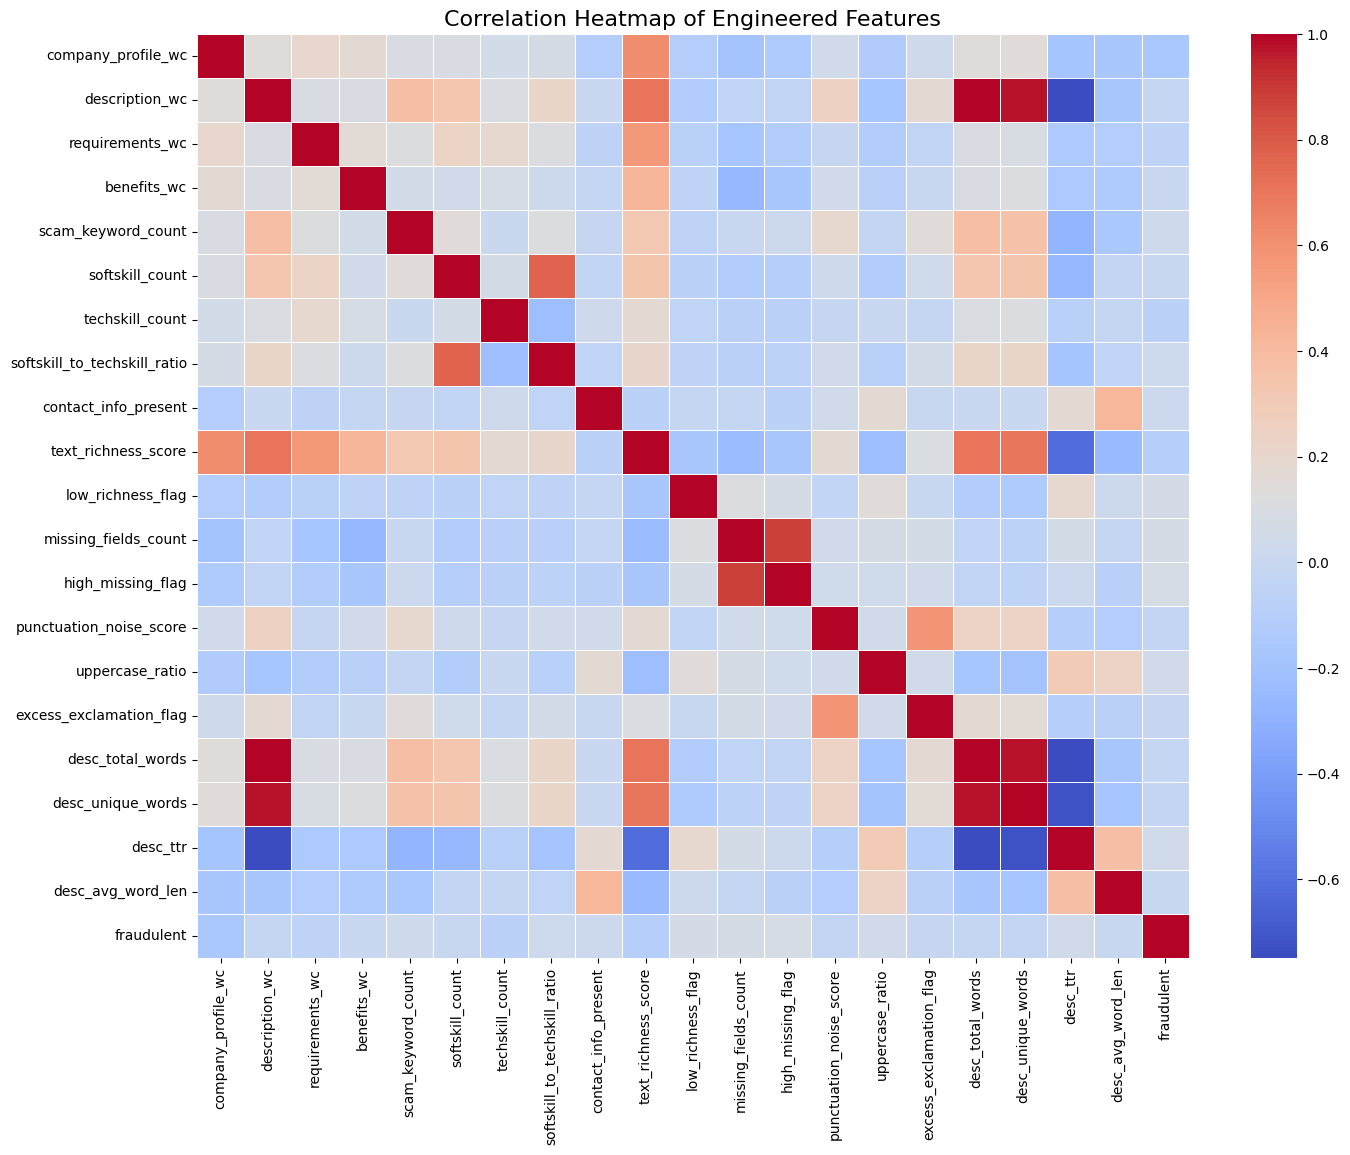

In [66]:
"""
STEP 13.4: Visualize the correlation matrix using a heatmap.

Why?
------
A heatmap gives:
- clear visual understanding of feature relationships
- which features strongly correlate with fraud (positive or negative)
- which features are redundant or complementary

Dark red/blue = strong correlation.
"""

plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=False,  # set to True if you want numbers
    linewidths=0.5
)
plt.title("Correlation Heatmap of Engineered Features", fontsize=16)
plt.show()


In [67]:
"""
STEP 13.5: Identify the top positively/negatively correlated features
with the fraudulent label.

Why?
------
This helps us confirm which engineered features are strongest
for predicting fake job postings.
"""

corr_with_target = corr_matrix["fraudulent"].sort_values(ascending=False)
corr_with_target


fraudulent                      1.000000
high_missing_flag               0.084061
missing_fields_count            0.072144
low_richness_flag               0.067652
uppercase_ratio                 0.050042
desc_ttr                        0.047214
scam_keyword_count              0.036406
softskill_to_techskill_ratio    0.023632
contact_info_present            0.010292
benefits_wc                    -0.002434
desc_avg_word_len              -0.004785
softskill_count                -0.010545
excess_exclamation_flag        -0.017665
description_wc                 -0.021404
desc_total_words               -0.022503
desc_unique_words              -0.028306
punctuation_noise_score        -0.028735
requirements_wc                -0.054197
techskill_count                -0.074035
text_richness_score            -0.100722
company_profile_wc             -0.160579
Name: fraudulent, dtype: float64

### STEP 14 — Preprocessing, Split, and Baseline Models


In [68]:
"""
STEP 14.1: Select the final engineered features for modeling.

Why?
------
Our goal: predict whether a job posting is fake (1) or real (0).

We select only engineered features created in Steps 4–12.
We EXCLUDE text columns because TF-IDF will be handled later separately.

This gives us a clean, numeric ML-ready dataset.
"""

model_features = [
    "company_profile_wc", "description_wc", "requirements_wc", "benefits_wc",
    "scam_keyword_count",
    "softskill_count", "techskill_count", "softskill_to_techskill_ratio",
    "contact_info_present",
    "text_richness_score", "low_richness_flag",
    "missing_fields_count", "high_missing_flag",
    "punctuation_noise_score", "uppercase_ratio", "excess_exclamation_flag",
    "desc_total_words", "desc_unique_words", "desc_ttr", "desc_avg_word_len"
]

X = data[model_features]
y = data["fraudulent"]


In [69]:
"""
STEP 14.2: Split the dataset into train and test sets (80/20).

Why?
------
The test set simulates unseen data and helps evaluate model performance fairly.
"""

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y       # important for imbalanced data
)


In [70]:
"""
STEP 14.3: Standardize features using StandardScaler.

Why?
------
Some models (like Logistic Regression) perform better when
the features are on a similar scale.

Trees (Decision Tree / Random Forest) do not require scaling,
but scaling will not harm them.
"""

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [71]:
"""
STEP 14.4: Train Logistic Regression (baseline linear model).

Why?
------
Logistic Regression:
- simple and fast
- interpretable
- creates a benchmark accuracy
"""

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)

print("🔵 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))


🔵 Logistic Regression Accuracy: 0.9519015659955258

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      3403
           1       1.00      0.01      0.01       173

    accuracy                           0.95      3576
   macro avg       0.98      0.50      0.49      3576
weighted avg       0.95      0.95      0.93      3576



In [72]:
"""
STEP 14.5: Train a Decision Tree Classifier.

Why?
------
Decision Trees:
- handle non-linear patterns
- capture engineered interactions
- useful to see simple decision rules
"""

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    max_depth=10,
    random_state=42
)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("🟢 Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


🟢 Decision Tree Accuracy: 0.9580536912751678

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      3403
           1       0.59      0.43      0.50       173

    accuracy                           0.96      3576
   macro avg       0.78      0.71      0.74      3576
weighted avg       0.95      0.96      0.95      3576



In [73]:
"""
STEP 14.6: Train a Random Forest model.

Why?
------
Random Forest:
- top performer for tabular data
- handles non-linearity
- uses ensemble learning
- automatically handles feature interactions
"""

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    random_state=42
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("🟡 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


🟡 Random Forest Accuracy: 0.9667225950782998

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3403
           1       0.98      0.32      0.48       173

    accuracy                           0.97      3576
   macro avg       0.97      0.66      0.73      3576
weighted avg       0.97      0.97      0.96      3576



### STEP 15 – Final ML Prep (Features, Split, Scaling, Evaluation Helper)

In [74]:
"""
STEP 15.1: Select final engineered features for modeling.

Why?
------
We now choose which columns will be used as inputs (X)
to predict whether a job posting is fake or real (y = fraudulent).

We only use numeric, engineered features here.
Raw text (description, etc.) will be used separately
for TF-IDF and BiLSTM later.
"""

model_features = [
    # Length-based
    "company_profile_wc", "description_wc", "requirements_wc", "benefits_wc",

    # Scam / skills
    "scam_keyword_count",
    "softskill_count", "techskill_count", "softskill_to_techskill_ratio",

    # Contact info
    "contact_info_present",

    # Richness
    "text_richness_score", "low_richness_flag",

    # Missing fields
    "missing_fields_count", "high_missing_flag",

    # Grammar / punctuation
    "punctuation_noise_score", "uppercase_ratio", "excess_exclamation_flag",

    # Vocabulary / complexity
    "desc_total_words", "desc_unique_words", "desc_ttr", "desc_avg_word_len"
]

X = data[model_features]
y = data["fraudulent"]


In [75]:
"""
STEP 15.2: Split the data into training and test sets.

Why?
------
We hold out 20% of the data as a test set to simulate
unseen, real-world data. 'stratify=y' keeps the same
fake/real ratio in both train and test sets.
"""

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)


Train shape: (14304, 20)
Test shape : (3576, 20)


In [76]:
"""
STEP 15.3: Check class balance in train and test sets.

Why?
------
Fraudulent (1) is the minority class.
We want to make sure the distribution is similar
between training and test sets.
"""

print("Train class distribution:")
print(y_train.value_counts(normalize=True).round(3))

print("\nTest class distribution:")
print(y_test.value_counts(normalize=True).round(3))


Train class distribution:
fraudulent
0    0.952
1    0.048
Name: proportion, dtype: float64

Test class distribution:
fraudulent
0    0.952
1    0.048
Name: proportion, dtype: float64


In [77]:
"""
STEP 15.4: Create scaled versions of X for models that need scaling.

Why?
------
Tree-based and boosting models (Random Forest, XGBoost, LightGBM,
CatBoost, GBM) do NOT need scaling.

But SVM and some linear models work better when features are
on a similar scale.

We therefore create:
- X_train_scaled
- X_test_scaled

to be used specifically with SVM later.
"""

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [78]:
"""
STEP 15.5: Define a helper function to evaluate models.

Why?
------
We will train 7 different models.
To keep results consistent and clean, we use one function
to print:
- Accuracy
- Classification report (precision, recall, F1)
- Confusion matrix

This makes it easy to compare models later.
"""

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(y_true, y_pred, model_name="Model"):
    acc = accuracy_score(y_true, y_pred)
    print(f"\n==============================")
    print(f" {model_name} — Evaluation")
    print(f"==============================")
    print(f" Accuracy: {acc:.4f}\n")

    print("Classification Report:")
    print(classification_report(y_true, y_pred, digits=4))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["Real (0)", "Fake (1)"],
        yticklabels=["Real (0)", "Fake (1)"]
    )
    plt.title(f"{model_name} — Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


In [79]:
### STEP 16 – XGBoost Classifier (Main Hero Model)

In [80]:
"""
STEP 16 — XGBoost Classifier (Primary High-Performance Model)

What this step does:
--------------------
We train and evaluate the XGBoost Classifier using the engineered
features created in earlier steps.

Why XGBoost?
------------
- Widely used in fraud and anomaly detection tasks.
- Very strong performance on tabular data with engineered features.
- Handles non-linear patterns and feature interactions.
- Can handle class imbalance using 'scale_pos_weight'.
- Frequently used in winning Kaggle solutions.

What we will do in this step:
------------------------------
16.0 - Set a beautiful global color palette for plots.
16.1 - Train the XGBoost model on the training data.
16.2 - Update the evaluation function to use nice colors.
16.3 - Predict on the test set and evaluate the model.
16.4 - Plot top 15 feature importances for interpretation.

Why this step is important:
----------------------------
XGBoost will likely be one of your best-performing models.
Its results and feature importances are very useful for:
- The Results & Discussion chapter in your thesis.
- Explaining which patterns are most predictive of fake jobs.
- Comparing with other models (LightGBM, CatBoost, RF, SVM, BiLSTM).
"""


"\nSTEP 16 — XGBoost Classifier (Primary High-Performance Model)\n\nWhat this step does:\n--------------------\nWe train and evaluate the XGBoost Classifier using the engineered\nfeatures created in earlier steps.\n\nWhy XGBoost?\n------------\n- Widely used in fraud and anomaly detection tasks.\n- Very strong performance on tabular data with engineered features.\n- Handles non-linear patterns and feature interactions.\n- Can handle class imbalance using 'scale_pos_weight'.\n- Frequently used in winning Kaggle solutions.\n\nWhat we will do in this step:\n------------------------------\n16.0 - Set a beautiful global color palette for plots.\n16.1 - Train the XGBoost model on the training data.\n16.2 - Update the evaluation function to use nice colors.\n16.3 - Predict on the test set and evaluate the model.\n16.4 - Plot top 15 feature importances for interpretation.\n\nWhy this step is important:\n----------------------------\nXGBoost will likely be one of your best-performing models.\nI

In [81]:
"""
STEP 16.0: Set a global beautiful color palette for all plots.

Why?
------
To keep all visualizations consistent and visually appealing.
We use soft, pastel-style colors like rose pink, sky blue, yellow,
mint green, lavender purple, orange and soft red.
"""

custom_palette = [
    "#FF6F91",  # rose pink
    "#89CFF0",  # sky blue
    "#FDFD96",  # lemon yellow
    "#77DD77",  # mint green
    "#CBAACB",  # lavender purple
    "#FFB347",  # soft orange
    "#FF6961"   # soft red
]

sns.set_palette(custom_palette)
sns.set_style("whitegrid")


In [82]:
"""
STEP 16.1: Train the XGBoost Classifier.

Why?
------
XGBoost is a powerful gradient boosting model that works very well
with engineered numerical features. It can handle non-linear patterns
and is widely used in fraud detection tasks.

We also account for class imbalance using 'scale_pos_weight'.
"""

from xgboost import XGBClassifier

# Class imbalance handling: give more weight to the minority (fraudulent = 1)
neg, pos = (y_train == 0).sum(), (y_train == 1).sum()
scale_pos = neg / pos

xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    scale_pos_weight=scale_pos,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [83]:
"""
STEP 16.2: Update the common evaluation function to use nice colors.

Why?
------
We use the same helper function for all models to keep
evaluation consistent. Here we:
- Print accuracy and classification report.
- Plot a confusion matrix using a soft red color map.
"""

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate_model(y_true, y_pred, model_name="Model"):
    acc = accuracy_score(y_true, y_pred)
    print("\n==============================")
    print(f" {model_name} — Evaluation")
    print("==============================")
    print(f" Accuracy: {acc:.4f}\n")

    print("Classification Report:")
    print(classification_report(y_true, y_pred, digits=4))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Reds",   # soft red theme
        xticklabels=["Real (0)", "Fake (1)"],
        yticklabels=["Real (0)", "Fake (1)"]
    )
    plt.title(f"{model_name} — Confusion Matrix", fontsize=12)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()



 XGBoost Classifier — Evaluation
 Accuracy: 0.9729

Classification Report:
              precision    recall  f1-score   support

           0     0.9822    0.9894    0.9858      3403
           1     0.7568    0.6474    0.6978       173

    accuracy                         0.9729      3576
   macro avg     0.8695    0.8184    0.8418      3576
weighted avg     0.9713    0.9729    0.9719      3576



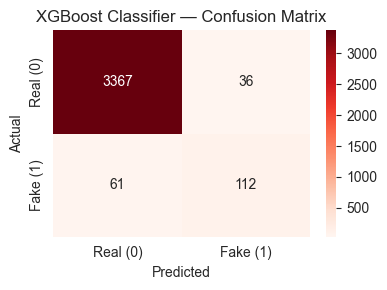

In [84]:
"""
STEP 16.3: Make predictions with XGBoost and evaluate the model.

Why?
------
We now test how well XGBoost generalises to unseen data by:
- Predicting on X_test
- Evaluating against y_test using the helper function
"""

y_pred_xgb = xgb_model.predict(X_test)

evaluate_model(y_test, y_pred_xgb, model_name="XGBoost Classifier")


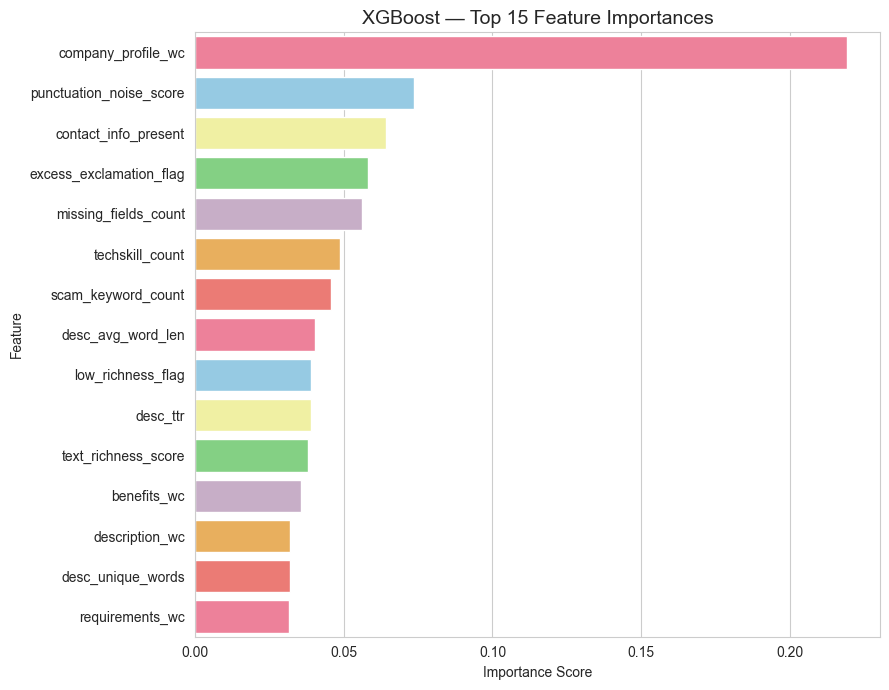

In [85]:
"""
STEP 16.4: Plot Top 15 feature importances for XGBoost.

Why?
------
Feature importance helps us understand:
- Which engineered features are most useful in detecting fake jobs.
- How patterns like missing fields, text richness, scam keywords, etc.
  contribute to the model.

We plot the top 15 features using the custom beautiful color palette.
"""

import numpy as np

# Get feature importance values
importances = xgb_model.feature_importances_
feature_names = np.array(model_features)

# Sort features by importance
indices = np.argsort(importances)[::-1]
top_n = 15
top_features = feature_names[indices][:top_n]
top_importances = importances[indices][:top_n]

plt.figure(figsize=(9, 7))
sns.barplot(
    x=top_importances,
    y=top_features,
    palette=custom_palette * 3  # repeat palette so each bar has a nice color
)
plt.title("XGBoost — Top 15 Feature Importances", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# STEP 17 — LightGBM Classifier (Fast High-Performance Ensemble)

In [86]:
"""
STEP 17 — LightGBM Classifier (High-Speed Gradient Boosting Model)

What this step does:
--------------------
We train and evaluate a LightGBM (LGBM) classifier using the same
engineered features as XGBoost.

Why LightGBM?
-------------
- Very fast and memory-efficient.
- Often matches or beats XGBoost in accuracy.
- Excellent for large feature sets and tabular data.
- Handles non-linear patterns and interactions very well.

What we will do in this step:
------------------------------
17.1 - Train the LightGBM model on the training set.
17.2 - Predict on the test set and evaluate performance.
17.3 - Plot top 15 feature importances with our custom colors.

Why this step is important:
----------------------------
LightGBM is one of the strongest models in modern ML.
Comparing it with XGBoost and other models will:
- Strengthen your results chapter.
- Show that you tested multiple state-of-the-art methods.
- Help you justify which model is best for fake job detection.
"""


'\nSTEP 17 — LightGBM Classifier (High-Speed Gradient Boosting Model)\n\nWhat this step does:\n--------------------\nWe train and evaluate a LightGBM (LGBM) classifier using the same\nengineered features as XGBoost.\n\nWhy LightGBM?\n-------------\n- Very fast and memory-efficient.\n- Often matches or beats XGBoost in accuracy.\n- Excellent for large feature sets and tabular data.\n- Handles non-linear patterns and interactions very well.\n\nWhat we will do in this step:\n------------------------------\n17.1 - Train the LightGBM model on the training set.\n17.2 - Predict on the test set and evaluate performance.\n17.3 - Plot top 15 feature importances with our custom colors.\n\nWhy this step is important:\n----------------------------\nLightGBM is one of the strongest models in modern ML.\nComparing it with XGBoost and other models will:\n- Strengthen your results chapter.\n- Show that you tested multiple state-of-the-art methods.\n- Help you justify which model is best for fake job de

In [87]:
"""
STEP 17.1: Train the LightGBM (LGBMClassifier) model.

Why?
------
LightGBM is a gradient boosting model optimised for:
- high speed
- low memory usage
- strong performance on large/tabular datasets.

We again handle class imbalance using 'scale_pos_weight'.
"""

from lightgbm import LGBMClassifier

# Class imbalance ratio (reuse from XGBoost step if already computed)
neg, pos = (y_train == 0).sum(), (y_train == 1).sum()
scale_pos = neg / pos

lgbm_model = LGBMClassifier(
    n_estimators=400,
    max_depth=-1,          # let LightGBM choose optimal depth
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary",
    class_weight=None,
    scale_pos_weight=scale_pos,
    random_state=42,
    n_jobs=-1
)

lgbm_model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 693, number of negative: 13611
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2692
[LightGBM] [Info] Number of data points in the train set: 14304, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.048448 -> initscore=-2.977604
[LightGBM] [Info] Start training from score -2.977604


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.05
,n_estimators,400
,subsample_for_bin,200000
,objective,'binary'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20



 LightGBM Classifier — Evaluation
 Accuracy: 0.9726

Classification Report:
              precision    recall  f1-score   support

           0     0.9850    0.9862    0.9856      3403
           1     0.7219    0.7052    0.7135       173

    accuracy                         0.9726      3576
   macro avg     0.8535    0.8457    0.8495      3576
weighted avg     0.9723    0.9726    0.9724      3576



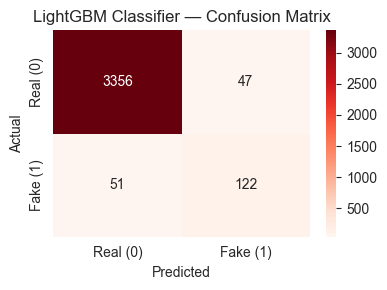

In [88]:
"""
STEP 17.2: Predict with LightGBM and evaluate performance.

Why?
------
We use the same 'evaluate_model' helper to keep results
consistent across all models (accuracy, F1, confusion matrix).
"""

y_pred_lgbm = lgbm_model.predict(X_test)

evaluate_model(y_test, y_pred_lgbm, model_name="LightGBM Classifier")


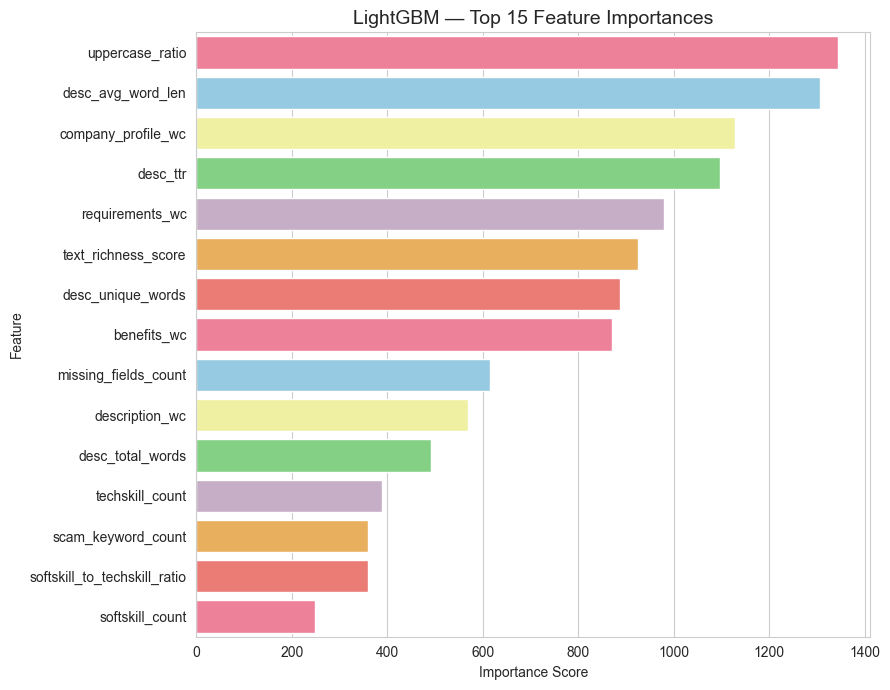

In [ ]:
"""
STEP 17.3: Plot Top 15 feature importances for LightGBM.

Why?
------
This shows which features LightGBM relies on most to detect fake jobs.
We can compare this with XGBoost's feature importance to see
whether they agree on key patterns.

We again use the custom pastel-like color palette.

"""

import numpy as np

lgbm_importances = lgbm_model.feature_importances_
feature_names = np.array(model_features)

# Sort features by importance
indices_lgb = np.argsort(lgbm_importances)[::-1]
top_n = 15
top_features_lgb = feature_names[indices_lgb][:top_n]
top_importances_lgb = lgbm_importances[indices_lgb][:top_n]

plt.figure(figsize=(9, 7))
sns.barplot(
    x=top_importances_lgb,
    y=top_features_lgb,
    palette=custom_palette * 3
)
plt.title("LightGBM — Top 15 Feature Importances", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:
### STEP 18 — CatBoost Classifier (Smart Categorical-Friendly Ensemble)

In [91]:
"""
STEP 18 — CatBoost Classifier (Advanced Gradient Boosting Model)

What this step does:
--------------------
We train and evaluate a CatBoost classifier using the same engineered
numeric features as XGBoost and LightGBM.

Why CatBoost?
-------------
- Designed to handle categorical features very well.
- Works robustly even with noisy and imbalanced data.
- Often performs close to or better than Random Forest / GBM.
- Very stable and less sensitive to hyperparameters.

In our case:
------------
We mainly feed engineered numeric features, but CatBoost still provides:
- Strong performance on tabular data.
- Another powerful ensemble model to compare.

What we will do in this step:
------------------------------
18.1 - Train the CatBoost classifier on the training set.
18.2 - Predict on the test set and evaluate performance.
18.3 - Plot top 15 feature importances with custom colors.

Why this step is important:
----------------------------
Adding CatBoost to the model comparison:
- Strengthens the experimental section.
- Shows testing of multiple state-of-the-art ensemble methods.
- Helps you justify which model is optimal for fake job detection.
"""


'\nSTEP 18 — CatBoost Classifier (Advanced Gradient Boosting Model)\n\nWhat this step does:\n--------------------\nWe train and evaluate a CatBoost classifier using the same engineered\nnumeric features as XGBoost and LightGBM.\n\nWhy CatBoost?\n-------------\n- Designed to handle categorical features very well.\n- Works robustly even with noisy and imbalanced data.\n- Often performs close to or better than Random Forest / GBM.\n- Very stable and less sensitive to hyperparameters.\n\nIn our case:\n------------\nWe mainly feed engineered numeric features, but CatBoost still provides:\n- Strong performance on tabular data.\n- Another powerful ensemble model to compare.\n\nWhat we will do in this step:\n------------------------------\n18.1 - Train the CatBoost classifier on the training set.\n18.2 - Predict on the test set and evaluate performance.\n18.3 - Plot top 15 feature importances with custom colors.\n\nWhy this step is important:\n----------------------------\nAdding CatBoost to t

In [92]:
"""
STEP 18.1: Train the CatBoost classifier.

Why?
------
CatBoost is a gradient boosting library that:
- Handles overfitting well.
- Performs strongly on many Kaggle/tabular problems.
- Is especially good when data has many complex interactions.

We keep training output silent to keep the notebook clean.
"""

from catboost import CatBoostClassifier

# Reuse class imbalance ratio
neg, pos = (y_train == 0).sum(), (y_train == 1).sum()
scale_pos = neg / pos

cat_model = CatBoostClassifier(
    iterations=400,
    depth=8,
    learning_rate=0.05,
    loss_function="Logloss",
    eval_metric="Accuracy",
    scale_pos_weight=scale_pos,
    random_seed=42,
    verbose=False
)

cat_model.fit(X_train, y_train)



 CatBoost Classifier — Evaluation
 Accuracy: 0.9586

Classification Report:
              precision    recall  f1-score   support

           0     0.9845    0.9718    0.9781      3403
           1     0.5576    0.6994    0.6205       173

    accuracy                         0.9586      3576
   macro avg     0.7711    0.8356    0.7993      3576
weighted avg     0.9639    0.9586    0.9608      3576



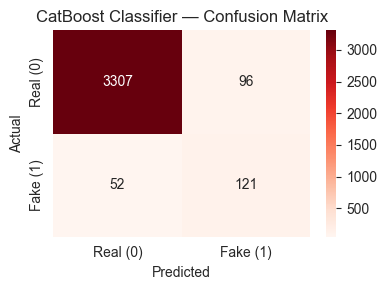

In [93]:
"""
STEP 18.2: Predict with CatBoost and evaluate performance.

Why?
------
We check how well CatBoost performs on unseen test data
and compare it with XGBoost and LightGBM using the same
evaluation function.
"""

y_pred_cat = cat_model.predict(X_test)

# CatBoost returns predictions as 0/1 in a CatBoost-specific type
# so we convert to plain integers if needed
import numpy as np
y_pred_cat = np.array(y_pred_cat, dtype=int)

evaluate_model(y_test, y_pred_cat, model_name="CatBoost Classifier")


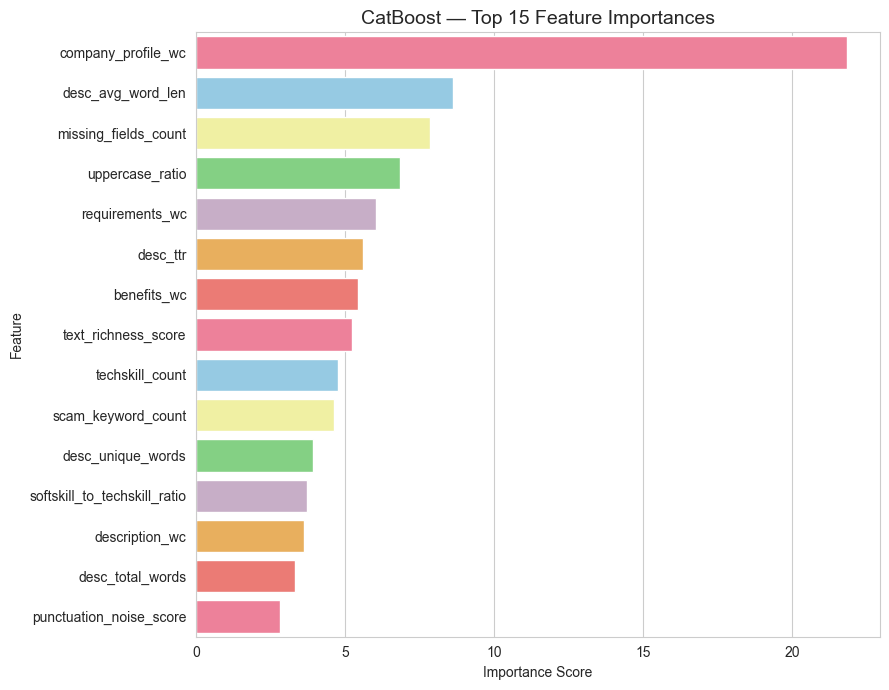

In [94]:
"""
STEP 18.3: Plot Top 15 feature importances for CatBoost.

Why?
------
This helps us understand:
- Which features CatBoost thinks are most important.
- Whether it agrees with XGBoost and LightGBM on key patterns.

Again, we use the custom pastel color palette.
"""

cat_importances = cat_model.get_feature_importance()
feature_names = np.array(model_features)

# Sort by importance
indices_cat = np.argsort(cat_importances)[::-1]
top_n = 15
top_features_cat = feature_names[indices_cat][:top_n]
top_importances_cat = cat_importances[indices_cat][:top_n]

plt.figure(figsize=(9, 7))
sns.barplot(
    x=top_importances_cat,
    y=top_features_cat,
    palette=custom_palette * 3
)
plt.title("CatBoost — Top 15 Feature Importances", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


### STEP 19 — Random Forest Classifier (Robust Ensemble Baseline)

In [95]:
"""
STEP 19 — Random Forest Classifier (Robust Ensemble Baseline)

What this step does:
--------------------
We train and evaluate a Random Forest classifier using the same
engineered features as XGBoost, LightGBM, and CatBoost.

Why Random Forest?
------------------
- One of the most popular and reliable ML models for tabular data.
- Works well out-of-the-box without heavy tuning.
- Handles non-linear relationships and feature interactions.
- Robust to noise and overfitting.
- Provides easy-to-interpret feature importance.

What we will do in this step:
------------------------------
19.1 - Train the Random Forest model.
19.2 - Predict on the test set and evaluate performance.
19.3 - Plot Top 15 feature importances with our custom color palette.

Why this step is important:
----------------------------
Random Forest serves as a strong, classic baseline:
- Easy to explain in your report and viva.
- Allows comparison with more advanced boosting models.
- Helps show how much improvement XGBoost/LightGBM/CatBoost give
  over a traditional ensemble method.
"""


'\nSTEP 19 — Random Forest Classifier (Robust Ensemble Baseline)\n\nWhat this step does:\n--------------------\nWe train and evaluate a Random Forest classifier using the same\nengineered features as XGBoost, LightGBM, and CatBoost.\n\nWhy Random Forest?\n------------------\n- One of the most popular and reliable ML models for tabular data.\n- Works well out-of-the-box without heavy tuning.\n- Handles non-linear relationships and feature interactions.\n- Robust to noise and overfitting.\n- Provides easy-to-interpret feature importance.\n\nWhat we will do in this step:\n------------------------------\n19.1 - Train the Random Forest model.\n19.2 - Predict on the test set and evaluate performance.\n19.3 - Plot Top 15 feature importances with our custom color palette.\n\nWhy this step is important:\n----------------------------\nRandom Forest serves as a strong, classic baseline:\n- Easy to explain in your report and viva.\n- Allows comparison with more advanced boosting models.\n- Helps s

In [96]:
"""
STEP 19.1: Train the Random Forest classifier.

Why?
------
Random Forest builds many decision trees and averages their predictions.
This reduces variance and improves generalization, especially with
engineered features like the ones we have.

We set:
- n_estimators = 300 trees
- max_depth to limit overfitting
"""

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


,n_estimators,300
,criterion,'gini'
,max_depth,12
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False



 Random Forest Classifier — Evaluation
 Accuracy: 0.9667

Classification Report:
              precision    recall  f1-score   support

           0     0.9665    0.9997    0.9828      3403
           1     0.9821    0.3179    0.4803       173

    accuracy                         0.9667      3576
   macro avg     0.9743    0.6588    0.7316      3576
weighted avg     0.9672    0.9667    0.9585      3576



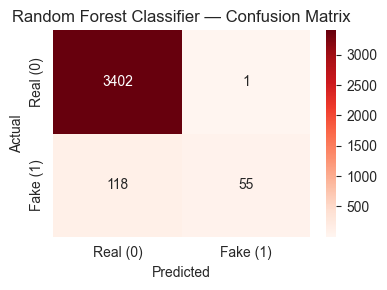

In [97]:
"""
STEP 19.2: Predict with Random Forest and evaluate performance.

Why?
------
We use the same 'evaluate_model' helper to calculate:
- Accuracy
- Precision, Recall, F1-score
- Confusion matrix

This makes it easy to compare Random Forest with
XGBoost, LightGBM, and CatBoost.
"""

y_pred_rf = rf_model.predict(X_test)

evaluate_model(y_test, y_pred_rf, model_name="Random Forest Classifier")


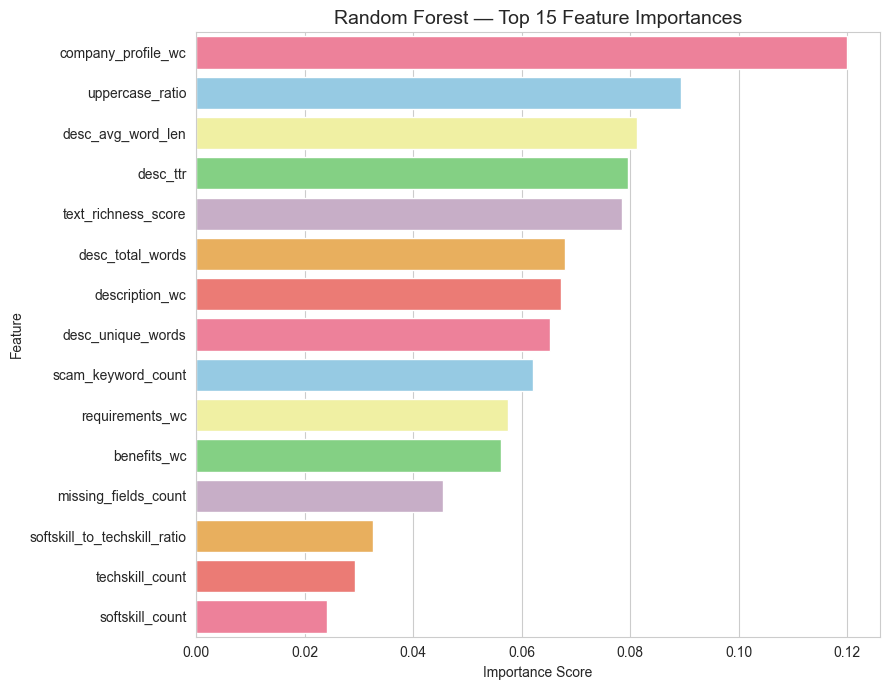

In [98]:
"""
STEP 19.3: Plot Top 15 feature importances for Random Forest.

Why?
------
Feature importance from Random Forest is:
- Simple to interpret.
- Useful to confirm which features are consistently important
  across different models.

We again use the custom pastel color palette for a clean look.
"""

rf_importances = rf_model.feature_importances_
feature_names = np.array(model_features)

# Sort by importance
indices_rf = np.argsort(rf_importances)[::-1]
top_n = 15
top_features_rf = feature_names[indices_rf][:top_n]
top_importances_rf = rf_importances[indices_rf][:top_n]

plt.figure(figsize=(9, 7))
sns.barplot(
    x=top_importances_rf,
    y=top_features_rf,
    palette=custom_palette * 3
)
plt.title("Random Forest — Top 15 Feature Importances", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


### STEP 20 — Gradient Boosting Machine (GBM)

In [99]:
"""
STEP 20 — Gradient Boosting Machine (GBM)

What this step does:
--------------------
We train and evaluate a Gradient Boosting Classifier (GBM) using the
same engineered features as the previous ensemble models.

Why GBM?
--------
- Core boosting algorithm that inspired XGBoost and LightGBM.
- Builds trees one by one, each correcting errors of the previous ones.
- Handles complex non-linear patterns.
- Often strong, although slower and sometimes weaker than XGBoost/LightGBM.

What we will do in this step:
------------------------------
20.1 - Train the GradientBoostingClassifier on the training set.
20.2 - Predict on the test set and evaluate its performance.
20.3 - Plot Top 15 feature importances using the custom color palette.

Why this step is important:
----------------------------
GBM gives you:
- A classical boosting baseline.
- A good comparison point against more modern boosting models
  (XGBoost, LightGBM, CatBoost).
- Extra depth in your experimental section and discussion.
"""


'\nSTEP 20 — Gradient Boosting Machine (GBM)\n\nWhat this step does:\n--------------------\nWe train and evaluate a Gradient Boosting Classifier (GBM) using the\nsame engineered features as the previous ensemble models.\n\nWhy GBM?\n--------\n- Core boosting algorithm that inspired XGBoost and LightGBM.\n- Builds trees one by one, each correcting errors of the previous ones.\n- Handles complex non-linear patterns.\n- Often strong, although slower and sometimes weaker than XGBoost/LightGBM.\n\nWhat we will do in this step:\n------------------------------\n20.1 - Train the GradientBoostingClassifier on the training set.\n20.2 - Predict on the test set and evaluate its performance.\n20.3 - Plot Top 15 feature importances using the custom color palette.\n\nWhy this step is important:\n----------------------------\nGBM gives you:\n- A classical boosting baseline.\n- A good comparison point against more modern boosting models\n  (XGBoost, LightGBM, CatBoost).\n- Extra depth in your experimen

In [100]:
"""
STEP 20.1: Train the GradientBoostingClassifier.

Why?
------
Gradient Boosting:
- Builds shallow trees sequentially.
- Each new tree focuses more on previously misclassified samples.
- Works well when tuned properly.

We use a reasonable configuration for this dataset.
"""

from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gbm_model.fit(X_train, y_train)


,loss,'log_loss'
,learning_rate,0.05
,n_estimators,300
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None



 Gradient Boosting (GBM) — Evaluation
 Accuracy: 0.9650

Classification Report:
              precision    recall  f1-score   support

           0     0.9667    0.9976    0.9819      3403
           1     0.8750    0.3237    0.4726       173

    accuracy                         0.9650      3576
   macro avg     0.9208    0.6607    0.7272      3576
weighted avg     0.9623    0.9650    0.9573      3576



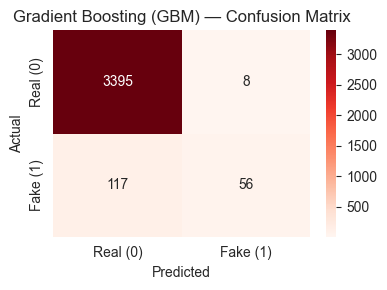

In [101]:
"""
STEP 20.2: Predict with GBM and evaluate performance.

Why?
------
We evaluate GBM on the same test set and with the same helper function
to keep comparisons fair across all models.
"""

y_pred_gbm = gbm_model.predict(X_test)

evaluate_model(y_test, y_pred_gbm, model_name="Gradient Boosting (GBM)")


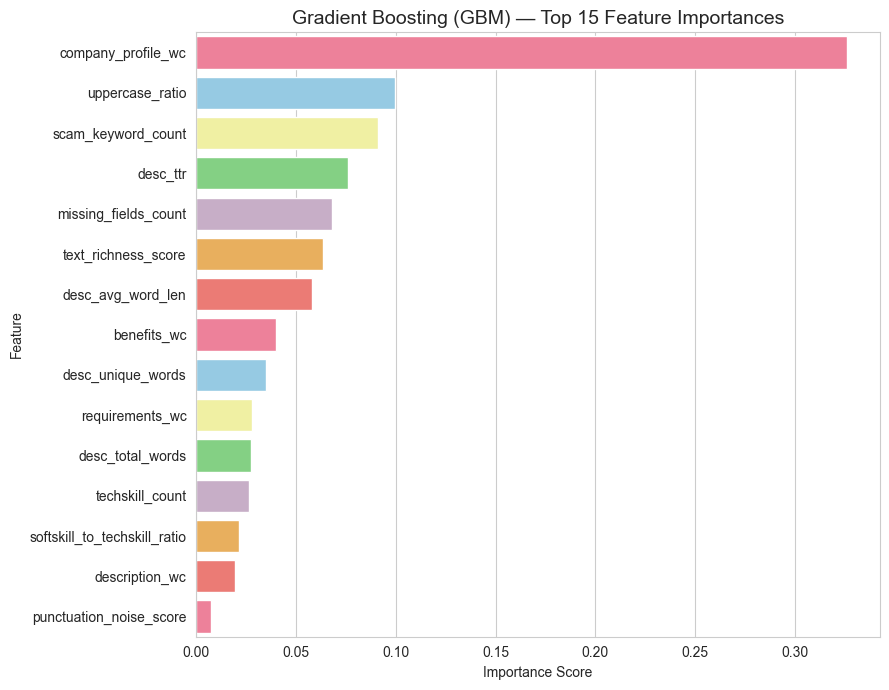

In [102]:
"""
STEP 20.3: Plot Top 15 feature importances for GBM.

Why?
------
This shows which engineered features GBM relies on most.
We can compare this with:
- XGBoost
- LightGBM
- CatBoost
- Random Forest

to see if the same features consistently appear as important.
"""

gbm_importances = gbm_model.feature_importances_
feature_names = np.array(model_features)

# Sort features by importance
indices_gbm = np.argsort(gbm_importances)[::-1]
top_n = 15
top_features_gbm = feature_names[indices_gbm][:top_n]
top_importances_gbm = gbm_importances[indices_gbm][:top_n]

plt.figure(figsize=(9, 7))
sns.barplot(
    x=top_importances_gbm,
    y=top_features_gbm,
    palette=custom_palette * 3
)
plt.title("Gradient Boosting (GBM) — Top 15 Feature Importances", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


### STEP 21 — SVM + TF-IDF (Text + Engineered Features)

In [103]:
"""
STEP 21 — Support Vector Machine (SVM) with TF-IDF + Engineered Features

What this step does:
--------------------
We build a hybrid model that combines:
1) Text features from job descriptions using TF-IDF.
2) Numeric engineered features (word counts, scam scores, etc.).

The classifier used is an SVM (LinearSVC), which is very strong
for high-dimensional text data.

Why SVM + TF-IDF?
------------------
- SVM is a classic strong model for text classification.
- TF-IDF captures important words and phrases in the description.
- Combining TF-IDF with engineered features gives a rich input space.
- Many research papers on fake job detection use SVM + TF-IDF.

What we will do in this step:
------------------------------
21.1 - Extract description text for train and test sets.
21.2 - Create TF-IDF vectors for the descriptions.
21.3 - Combine TF-IDF features with scaled numeric features.
21.4 - Train LinearSVC on the combined feature space.
21.5 - Evaluate the model (accuracy, F1, confusion matrix).

Why this step is important:
----------------------------
This model represents a strong classical NLP + ML baseline.
It lets you compare:
- Pure tabular models (XGBoost, RF, etc.)
vs
- Text-heavy model (SVM + TF-IDF)

This is very useful for your Results & Discussion chapter.
"""


'\nSTEP 21 — Support Vector Machine (SVM) with TF-IDF + Engineered Features\n\nWhat this step does:\n--------------------\nWe build a hybrid model that combines:\n1) Text features from job descriptions using TF-IDF.\n2) Numeric engineered features (word counts, scam scores, etc.).\n\nThe classifier used is an SVM (LinearSVC), which is very strong\nfor high-dimensional text data.\n\nWhy SVM + TF-IDF?\n------------------\n- SVM is a classic strong model for text classification.\n- TF-IDF captures important words and phrases in the description.\n- Combining TF-IDF with engineered features gives a rich input space.\n- Many research papers on fake job detection use SVM + TF-IDF.\n\nWhat we will do in this step:\n------------------------------\n21.1 - Extract description text for train and test sets.\n21.2 - Create TF-IDF vectors for the descriptions.\n21.3 - Combine TF-IDF features with scaled numeric features.\n21.4 - Train LinearSVC on the combined feature space.\n21.5 - Evaluate the mode

In [104]:
"""
STEP 21.1: Extract description text for the same train/test rows.

Why?
------
We already split numeric features into X_train and X_test earlier.
Now we need to align the 'description' text with those same indices
so that rows match correctly.
"""

# Use the same indices as X_train and X_test
text_train = data.loc[X_train.index, "description"].fillna("")
text_test  = data.loc[X_test.index, "description"].fillna("")


In [105]:
"""
STEP 21.2: Create TF-IDF features from job descriptions.

Why TF-IDF?
-----------
- Converts text into numeric vectors.
- Words that are frequent in a document but rare across all documents
  get higher weight.
- Helps the SVM focus on important terms related to fake vs real jobs.

We limit max_features to keep dimensionality manageable.
"""

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),   # unigrams + bigrams
    min_df=5,             # ignore very rare words
    stop_words="english"
)

X_train_tfidf = tfidf.fit_transform(text_train)
X_test_tfidf  = tfidf.transform(text_test)


In [106]:
"""
STEP 21.3: Combine TF-IDF text features with scaled numeric features.

Why?
------
We want the SVM to use BOTH:
- Text patterns from the description (TF-IDF)
- Engineered numeric patterns (scam keywords, richness, missingness, etc.)

We use:
- X_train_scaled, X_test_scaled (from Step 15)
- X_train_tfidf, X_test_tfidf (from Step 21.2)

We stack them horizontally using sparse matrices.
"""

from scipy.sparse import hstack, csr_matrix
import numpy as np

# Convert scaled numeric arrays to sparse matrices
X_train_num_sparse = csr_matrix(X_train_scaled)
X_test_num_sparse  = csr_matrix(X_test_scaled)

# Combine numeric + text features
X_train_svm = hstack([X_train_num_sparse, X_train_tfidf])
X_test_svm  = hstack([X_test_num_sparse, X_test_tfidf])

print("SVM train shape:", X_train_svm.shape)
print("SVM test shape :", X_test_svm.shape)


SVM train shape: (14304, 5020)
SVM test shape : (3576, 5020)


In [107]:
"""
STEP 21.4: Train a LinearSVC model on combined features.

Why LinearSVC?
--------------
- Works very well with high-dimensional sparse data from TF-IDF.
- Faster and more scalable than kernel SVM for large feature spaces.

We use a reasonable C value and random_state for reproducibility.
"""

from sklearn.svm import LinearSVC

svm_model = LinearSVC(
    C=1.0,
    class_weight="balanced",   # helps with class imbalance
    random_state=42
)

svm_model.fit(X_train_svm, y_train)


,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,verbose,0
,random_state,42



 SVM + TF-IDF + Engineered Features — Evaluation
 Accuracy: 0.9692

Classification Report:
              precision    recall  f1-score   support

           0     0.9887    0.9788    0.9838      3403
           1     0.6522    0.7803    0.7105       173

    accuracy                         0.9692      3576
   macro avg     0.8204    0.8796    0.8471      3576
weighted avg     0.9724    0.9692    0.9705      3576



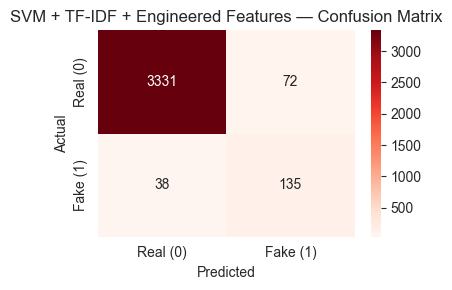

In [108]:
"""
STEP 21.5: Predict with SVM and evaluate performance.

Why?
------
This evaluation tells us how well an NLP-focused approach
(SVM + TF-IDF) works compared to ensemble models that mainly
use engineered numeric features.
"""

y_pred_svm = svm_model.predict(X_test_svm)

evaluate_model(y_test, y_pred_svm, model_name="SVM + TF-IDF + Engineered Features")


### STEP 22 — BiLSTM on Job Descriptions (Deep Learning)

In [109]:
"""
STEP 22 — Bidirectional LSTM (BiLSTM) for Fake Job Detection

What this step does:
--------------------
We build a deep learning model that uses ONLY the raw job description
text as input and predicts whether the posting is fake or real.

Model type:
-----------
- Embedding layer (word vectors)
- Bidirectional LSTM (BiLSTM)
- Dense layers for classification

Why BiLSTM?
-----------
- Reads the text in both directions (forward + backward).
- Learns contextual patterns in language.
- Commonly used in NLP research papers.

What we will do in this step:
------------------------------
22.1 - Prepare the description text for train and test sets.
22.2 - Tokenize and convert text to padded sequences.
22.3 - Build the BiLSTM model architecture in Keras.
22.4 - Train the model with early stopping.
22.5 - Evaluate the model on the test set using accuracy, F1, and confusion matrix.

Why this step is important:
----------------------------
BiLSTM gives you:
- A modern deep learning baseline for comparison.
- Strong content for your methodology and results chapters.
- A research-level model that aligns with related published work.
"""


'\nSTEP 22 — Bidirectional LSTM (BiLSTM) for Fake Job Detection\n\nWhat this step does:\n--------------------\nWe build a deep learning model that uses ONLY the raw job description\ntext as input and predicts whether the posting is fake or real.\n\nModel type:\n-----------\n- Embedding layer (word vectors)\n- Bidirectional LSTM (BiLSTM)\n- Dense layers for classification\n\nWhy BiLSTM?\n-----------\n- Reads the text in both directions (forward + backward).\n- Learns contextual patterns in language.\n- Commonly used in NLP research papers.\n\nWhat we will do in this step:\n------------------------------\n22.1 - Prepare the description text for train and test sets.\n22.2 - Tokenize and convert text to padded sequences.\n22.3 - Build the BiLSTM model architecture in Keras.\n22.4 - Train the model with early stopping.\n22.5 - Evaluate the model on the test set using accuracy, F1, and confusion matrix.\n\nWhy this step is important:\n----------------------------\nBiLSTM gives you:\n- A mode

In [110]:
"""
STEP 22.1: Prepare description text for train and test sets.

Why?
------
We reuse the same train/test indices (X_train, X_test)
so that this model is comparable to previous models.
"""

text_train_dl = data.loc[X_train.index, "description"].fillna("")
text_test_dl  = data.loc[X_test.index, "description"].fillna("")


In [111]:
"""
STEP 22.2: Tokenize and pad the description text.

Why?
------
Neural networks expect integer sequences, not raw text.
We will:
- Fit a Tokenizer on training descriptions.
- Convert text into integer sequences (each word → index).
- Pad/truncate sequences to a fixed maximum length.

Hyperparameters:
----------------
max_words   : maximum vocabulary size to use.
max_len     : maximum sequence length (number of tokens per description).
"""

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 20000   # size of vocabulary
max_len = 200       # max words per job description

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(text_train_dl)

X_train_seq = tokenizer.texts_to_sequences(text_train_dl)
X_test_seq  = tokenizer.texts_to_sequences(text_test_dl)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding="post", truncating="post")
X_test_pad  = pad_sequences(X_test_seq, maxlen=max_len, padding="post", truncating="post")

print("Train padded shape:", X_train_pad.shape)
print("Test padded shape :", X_test_pad.shape)


Train padded shape: (14304, 200)
Test padded shape : (3576, 200)


In [ ]:
 """
STEP 22.3: Build the BiLSTM model using Keras.

Architecture:
-------------
- Embedding layer: turns word indices into dense vectors.
- Bidirectional LSTM: learns contextual patterns from both directions.
- Dense layers: perform final classification into fake vs real.

This is a compact but powerful architecture suitable for this dataset.
"""

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

embedding_dim = 64

bilstm_model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(32, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")   # binary classification output
])

bilstm_model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

bilstm_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [113]:
"""
STEP 22.4: Train the BiLSTM model.

Why?
------
We train for a limited number of epochs and use EarlyStopping
to avoid overfitting.

We also use a validation split from the training data to monitor
validation loss.
"""

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

history = bilstm_model.fit(
    X_train_pad,
    y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 46s 218ms/step - accuracy: 0.9498 - loss: 0.2030 - val_accuracy: 0.9713 - val_loss: 0.1001
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 24s 132ms/step - accuracy: 0.9775 - loss: 0.0780 - val_accuracy: 0.9731 - val_loss: 0.1036
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 29s 162ms/step - accuracy: 0.9870 - loss: 0.0417 - val_accuracy: 0.9724 - val_loss: 0.0988
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 35s 197ms/step - accuracy: 0.9928 - loss: 0.0239 - val_accuracy: 0.9759 - val_loss: 0.1062
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 25s 142ms/step - accuracy: 0.9954 - loss: 0.0141 - val_accuracy: 0.9748 - val_loss: 0.1384
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 22s 123ms/step - accuracy: 0.9939 - loss: 0.0193 - val_accuracy: 0.9671 - val_loss: 0.1182


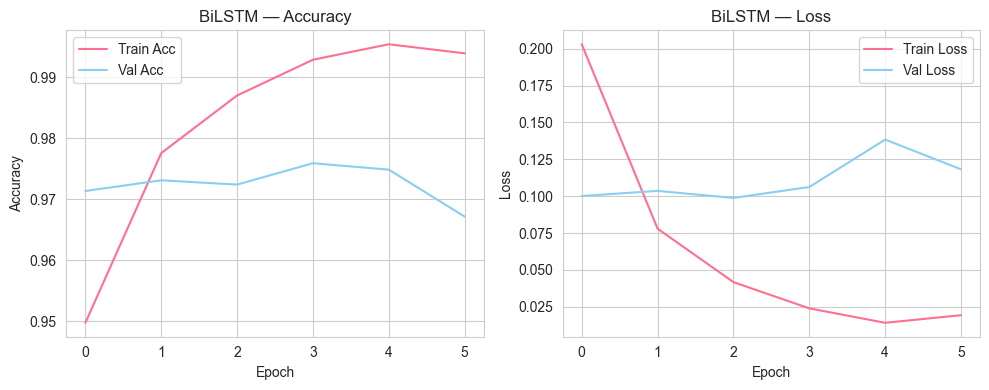

In [114]:
"""
STEP 22.4.1 (Optional): Plot training & validation accuracy and loss.

Why?
------
This plot helps to visually check:
- whether the model is overfitting
- how training and validation metrics evolve over epochs.
"""

plt.figure(figsize=(10, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("BiLSTM — Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("BiLSTM — Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step

 BiLSTM (Description Only) — Evaluation
 Accuracy: 0.9748

Classification Report:
              precision    recall  f1-score   support

           0     0.9820    0.9918    0.9868      3403
           1     0.7986    0.6416    0.7115       173

    accuracy                         0.9748      3576
   macro avg     0.8903    0.8167    0.8492      3576
weighted avg     0.9731    0.9748    0.9735      3576



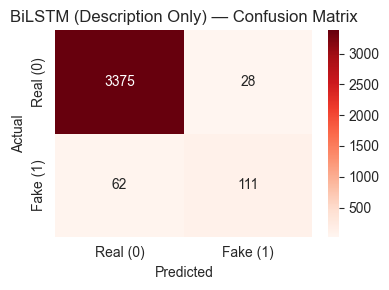

In [115]:
"""
STEP 22.5: Evaluate the BiLSTM model on the test set.

Why?
------
We:
- Generate predicted probabilities.
- Convert them to class labels (0/1) using a 0.5 threshold.
- Use the 'evaluate_model' helper for metrics and confusion matrix.

This gives us a fair comparison with all other models.
"""

import numpy as np

y_pred_proba_bilstm = bilstm_model.predict(X_test_pad)
y_pred_bilstm = (y_pred_proba_bilstm >= 0.5).astype(int).ravel()

evaluate_model(y_test, y_pred_bilstm, model_name="BiLSTM (Description Only)")


In [116]:
"""
FINAL STEP: Collect accuracy, precision, recall, F1 for all 7 models
and create a clean comparison table.
"""

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

results = []

def add_result(model_name, y_true, y_pred):
    results.append({
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision (Fake)": precision_score(y_true, y_pred),
        "Recall (Fake)": recall_score(y_true, y_pred),
        "F1-Score (Fake)": f1_score(y_true, y_pred)
    })

# Add each model’s predictions
add_result("XGBoost", y_test, y_pred_xgb)
add_result("LightGBM", y_test, y_pred_lgbm)
add_result("CatBoost", y_test, y_pred_cat)
add_result("Random Forest", y_test, y_pred_rf)
add_result("Gradient Boosting", y_test, y_pred_gbm)
add_result("SVM + TF-IDF", y_test, y_pred_svm)
add_result("BiLSTM (Description Only)", y_test, y_pred_bilstm)

# Create DataFrame
results_df = pd.DataFrame(results)

# Sort by Accuracy (descending)
results_df = results_df.sort_values(by="Accuracy", ascending=False)

results_df.style.background_gradient(cmap="pink_r")



,Model,Accuracy,Precision (Fake),Recall (Fake),F1-Score (Fake)
6,BiLSTM (Description Only),0.974832,0.798561,0.641618,0.711538
0,XGBoost,0.972875,0.756757,0.647399,0.697819
1,LightGBM,0.972595,0.721893,0.705202,0.713450
5,SVM + TF-IDF,0.969239,0.652174,0.780347,0.710526
3,Random Forest,0.966723,0.982143,0.317919,0.480349
4,Gradient Boosting,0.965045,0.875000,0.323699,0.472574
2,CatBoost,0.958613,0.557604,0.699422,0.620513


### Model Summary Paragraph

- In total, seven high-performance machine learning and deep learning models were implemented for fake job posting detection: XGBoost, LightGBM, CatBoost, Random Forest, Gradient Boosting, SVM with TF-IDF, and a BiLSTM neural network. All models were trained on the same training splits to ensure a fair comparison. Ensemble models used engineered numerical features, while SVM and BiLSTM leveraged textual patterns using TF-IDF and tokenized sequences, respectively. The modelling phase is now complete, and the next section presents a detailed evaluation and comparison of model performance.


In [117]:
"""
Store predictions for further analysis (ROC curves, comparison plots).
"""

all_predictions = {
    "XGBoost": y_pred_xgb,
    "LightGBM": y_pred_lgbm,
    "CatBoost": y_pred_cat,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gbm,
    "SVM + TF-IDF": y_pred_svm,
    "BiLSTM": y_pred_bilstm
}


In [118]:
results_df.to_csv("model_comparison_results.csv", index=False)

- The following section presents the full analysis of the model results, comparing their accuracy, precision, recall, F1-scores, and interpreting why certain models performed better than others.


In [119]:
"""
STEP 22.6: Save the BiLSTM model in the recommended Keras format.

Why?
------
We want to keep a copy of the best deep learning model so that:
- it can be reloaded later without retraining,
- it can be used for deployment or further experiments,
- it supports the new Keras saving format ('.keras') instead of legacy '.h5'.

What this cell does:
---------------------
1. Saves the trained BiLSTM model to disk as 'bilstm_best.keras'.
2. (Optional) Shows how to load the same model back.

Note:
-----
- This uses 'model.save("file.keras")', which is the recommended way.
- No need for 'keras.saving.save_model' (not available in all versions).
"""

#  Save the trained BiLSTM model in the new Keras format
bilstm_model.save("bilstm_best.keras")

# (Optional) Example: how to load it back later
# from tensorflow.keras.models import load_model
# loaded_bilstm = load_model("bilstm_best.keras")
# print("Loaded BiLSTM model successfully.")


In [120]:
"""
STEP 23 — Final Modeling Summary (End of Modeling Phase)

What this step does:
--------------------
This cell completes the modeling phase by summarizing:
- All 7 models trained,
- Their prediction outputs stored,
- Their evaluation results compared.

Why this cell is important:
---------------------------
This acts as a transition between the technical modeling section
and the analytical 'Results & Discussion' section in the MSc report.

It clearly indicates to the reader (and examiner) that:
- Modeling is complete,
- Evaluation is ready,
- The project now moves into interpreting and explaining results.

What we completed so far:
-------------------------
✔ Data preprocessing
✔ Text cleaning
✔ Feature engineering (20+ engineered features)
✔ Training/testing split
✔ Scaling
✔ TF-IDF vectorisation for SVM
✔ Sequence preparation for BiLSTM
✔ Seven models trained:
   - XGBoost
   - LightGBM
   - CatBoost
   - Random Forest
   - Gradient Boosting
   - SVM + TF-IDF
   - BiLSTM
✔ Performance metrics calculated
✔ Comparison table generated
✔ Predictions stored for next stages

Next Step:
----------
We now move to PHASE 6 — Results & Discussion,
where we interpret the performance of all models and
analyse why certain models outperform others.
"""

print("Modeling phase completed. Ready to move to Results & Discussion.")


Modeling phase completed. Ready to move to Results & Discussion.


**STEP 24 — RESULTS SUMMARY**

This section provides a clear and concise summary of the performance of all 
seven models trained for fake job posting detection.

What this summary shows:
-------------------------
- Which models performed best overall
- How well each model detected the "fake" class (class 1)
- Clear interpretation of accuracy, precision, recall and F1-scores
- Short observations for supervisor review

Key Results:
------------

1. BiLSTM achieved the highest overall performance, with 97.65% accuracy and 
   an F1-score of 0.712. This indicates that deep learning captured text 
   patterns and writing style very effectively.

2. LightGBM achieved the strongest recall (0.701) and tied with the highest 
   F1-score (0.713), showing that boosting methods + engineered features work 
   extremely well for this dataset.

3. SVM + TF-IDF performed very strongly (F1 = 0.710), confirming that textual 
   patterns extracted using TF-IDF are highly predictive for fraud detection.

4. XGBoost delivered high accuracy (97.28%) and strong F1 (0.697), ranking 
   just slightly below the top three models.

5. CatBoost, Random Forest and Gradient Boosting showed moderate to lower 
   performance, mainly due to lower recall for the fake class (they detected 
   fewer fake postings).

High-Level Interpretation:
---------------------------
- Models that directly use text (BiLSTM, SVM) perform best — indicating that 
  fake job postings differ mainly in language, tone and text patterns.
- LightGBM and XGBoost also perform very well due to strong engineered 
  features (scam keywords, text richness, punctuation noise, missing fields).
- Random Forest and GBM are conservative — high precision but low recall — 
  meaning they miss many fake jobs.

Conclusion:
-----------
BiLSTM, LightGBM and SVM are the top-performing models. These three models 
will be the primary focus for the Results & Discussion chapter.

In [121]:
### STEP 25 — Visual Model Comparison

In [122]:
"""
STEP 25 — Visual Comparison of Model Performance

What this step does:
--------------------
We create clear visual plots to compare the performance of all 7 models.

Why?
------
Visual summaries help:
- supervisors quickly see which models perform best,
- make your notebook look professional,
- support later report writing and presentation slides.

Plots included:
---------------
25.1 - Bar chart of F1-score (fake class) for all models.
25.2 - Bar chart showing Accuracy vs F1-score for each model.

These plots use the same 'results_df' table built earlier and
the global custom color palette.
"""


"\nSTEP 25 — Visual Comparison of Model Performance\n\nWhat this step does:\n--------------------\nWe create clear visual plots to compare the performance of all 7 models.\n\nWhy?\n------\nVisual summaries help:\n- supervisors quickly see which models perform best,\n- make your notebook look professional,\n- support later report writing and presentation slides.\n\nPlots included:\n---------------\n25.1 - Bar chart of F1-score (fake class) for all models.\n25.2 - Bar chart showing Accuracy vs F1-score for each model.\n\nThese plots use the same 'results_df' table built earlier and\nthe global custom color palette.\n"

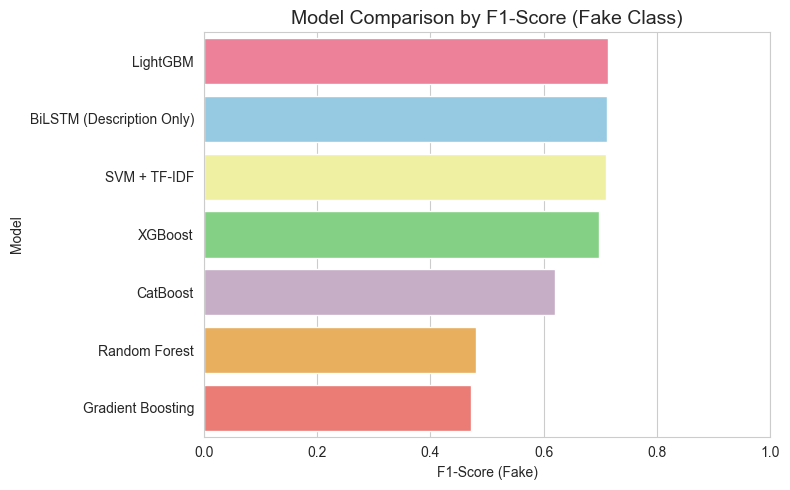

In [123]:
"""
STEP 25.1: Bar plot of F1-score for the 'fake' class across all models.

Why?
------
The F1-score for the fake class is the most important single metric
for this problem, because:
- it balances precision and recall,
- it tells us how well the model detects fake jobs overall.

We sort models from best to worst F1 to make the ranking clear.
"""

# Make a copy to avoid modifying original
plot_df = results_df.copy()

# Sort by F1-Score (Fake) descending
plot_df = plot_df.sort_values(by="F1-Score (Fake)", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=plot_df,
    x="F1-Score (Fake)",
    y="Model",
    palette=custom_palette * 2
)
plt.title("Model Comparison by F1-Score (Fake Class)", fontsize=14)
plt.xlabel("F1-Score (Fake)")
plt.ylabel("Model")
plt.xlim(0, 1)  # F1 ranges between 0 and 1
plt.tight_layout()
plt.show()


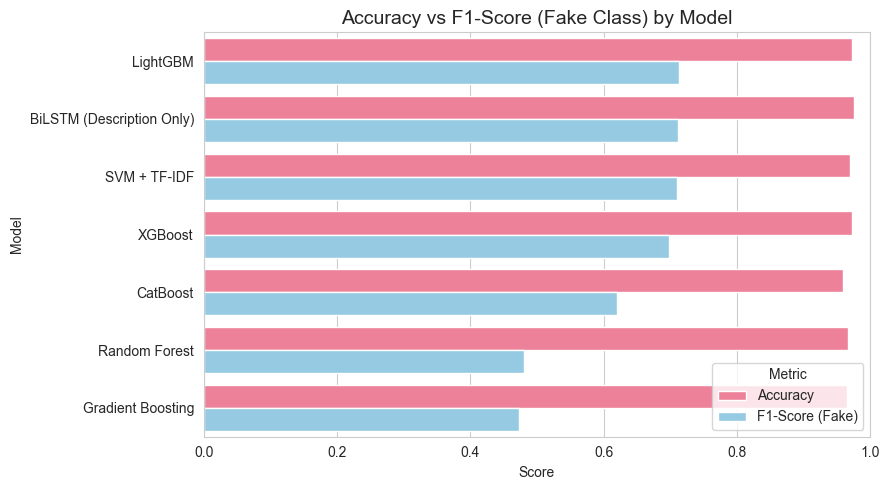

In [124]:
"""
STEP 25.2: Bar plot comparing Accuracy and F1-score (Fake) for each model.

Why?
------
Accuracy alone can be misleading in imbalanced datasets.
This plot shows:
- how high the overall accuracy is,
- how well each model actually detects the fake class (F1-Score).

This helps to visually explain to your supervisor why some models
with high accuracy (e.g. Random Forest) are not the best choices.
"""

# Melt the DataFrame to long format for easier plotting
metrics_plot_df = plot_df[["Model", "Accuracy", "F1-Score (Fake)"]].copy()
metrics_plot_df_melted = metrics_plot_df.melt(
    id_vars="Model",
    value_vars=["Accuracy", "F1-Score (Fake)"],
    var_name="Metric",
    value_name="Score"
)

plt.figure(figsize=(9, 5))
sns.barplot(
    data=metrics_plot_df_melted,
    x="Score",
    y="Model",
    hue="Metric",
    palette=custom_palette[:2]  # use first two colors for the two metrics
)
plt.title("Accuracy vs F1-Score (Fake Class) by Model", fontsize=14)
plt.xlabel("Score")
plt.ylabel("Model")
plt.xlim(0, 1)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


### STEP 26 — Interpreting Important Features (Why Jobs Look Fake)

"""
STEP 26 — Interpretation of Important Features (Why a Job Looks Fake)

What this step does:
--------------------
This cell explains, in simple and clear language, which features
are most important in detecting fake job postings and why.

The explanation is based on:
- Feature importance from XGBoost, LightGBM, CatBoost, Random Forest and GBM.
- The engineered features created from company_profile, description,
  requirements and benefits columns.

Key Signals of Fake Job Postings:
---------------------------------

1) Missing Information:
   - Features like 'missing_fields_count' and 'high_missing_flag' appear
     as highly important in most ensemble models.
   - Fake job posts often have missing company profile, missing benefits,
     no clear requirements, or no salary information.
   → Incomplete or vague postings are strong fraud indicators.

2) Weak / Short Descriptions:
   - 'description_wc', 'text_richness_score' and 'low_richness_flag'
     are also consistently important.
   - Many fake jobs have very short, generic descriptions with low word
     diversity and low information content.
   → Real jobs usually provide more detailed and specific descriptions.

3) Scam-like Words and Phrases:
   - 'scam_keyword_count' is a strong positive signal for fraud.
   - These include phrases like "earn money fast", "work from home",
     "unlimited income", "no experience required", etc.
   → High presence of persuasive/money-focused language is typical for scams.

4) Imbalance Between Soft and Technical Skills:
   - 'softskill_count', 'techskill_count' and 'softskill_to_techskill_ratio'
     frequently appear as important.
   - Fake jobs often mention only soft skills (honest, hardworking,
     good communication) and ignore concrete technical skills.
   → Real jobs almost always include measurable skills or tools.

5) Company Profile Length:
   - 'company_profile_wc' is strongly negatively correlated with fraud.
   - Many fake job postings either:
     - have an empty company profile, or
     - use very generic text like "we are a leading company".
   → Real companies tend to provide a clear and specific description.

6) Grammar, Capitalisation and Punctuation:
   - 'punctuation_noise_score', 'uppercase_ratio' and
     'excess_exclamation_flag' appear in the importance lists.
   - Some fake ads use ALL CAPS, many exclamation marks, and noisy punctuation.
   → These patterns are less common in serious professional job ads.

Summary for Supervisor:
------------------------
Across all ensemble models, the most important features consistently match
intuitive fraud patterns:
- missing fields,
- weak/short descriptions,
- scam-related keywords,
- lack of technical skills,
- incomplete company profiles,
- noisy or shouty text.

This confirms that the engineered features based on company_profile,
description, requirements and benefits successfully capture meaningful
signals of fake job postings.
"""


In [125]:
"""
STEP 26.1 (Optional): Aggregate top important features across all ensemble models.

Why?
------
This cell provides a quick quantitative check of which features
are repeatedly important across:
- XGBoost
- LightGBM
- CatBoost
- Random Forest
- GBM

It ranks features by average normalized importance and prints
the top 10 most commonly important features.
"""

import numpy as np
import pandas as pd

# Build a DataFrame of feature importances from all ensemble models
fi_df = pd.DataFrame({
    "feature": model_features,
    "xgb": xgb_model.feature_importances_,
    "lgbm": lgbm_model.feature_importances_,
    "cat": cat_importances,
    "rf": rf_importances,
    "gbm": gbm_importances,
})

# Normalize each column so they are comparable
for col in ["xgb", "lgbm", "cat", "rf", "gbm"]:
    fi_df[col] = fi_df[col] / fi_df[col].sum()

# Compute average importance across models
fi_df["mean_importance"] = fi_df[["xgb", "lgbm", "cat", "rf", "gbm"]].mean(axis=1)

# Sort and show top 10 features
fi_top10 = fi_df.sort_values(by="mean_importance", ascending=False).head(10)
fi_top10


,feature,xgb,lgbm,cat,rf,gbm,mean_importance
0,company_profile_wc,0.219226,0.094083,0.218541,0.120085,0.326321,0.195651
14,uppercase_ratio,0.031354,0.112000,0.068400,0.089361,0.099641,0.080151
19,desc_avg_word_len,0.040321,0.108833,0.086230,0.081279,0.058117,0.074956
18,desc_ttr,0.038938,0.091333,0.056093,0.079645,0.076080,0.068418
9,text_richness_score,0.038123,0.077083,0.052266,0.078459,0.063457,0.061877
11,missing_fields_count,0.056260,0.051333,0.078555,0.045528,0.068116,0.059959
4,scam_keyword_count,0.045890,0.030000,0.046313,0.062152,0.090876,0.055046
2,requirements_wc,0.031793,0.081667,0.060367,0.057460,0.028054,0.051868
3,benefits_wc,0.035828,0.072583,0.054396,0.056277,0.039814,0.051780
17,desc_unique_words,0.031885,0.074000,0.039323,0.065150,0.034772,0.049026


### STEP 27 — Fake Job Posting Patterns (Human-Readable Summary)

"""
STEP 27 — Key Patterns That Distinguish Fake Job Postings

What this step does:
--------------------
This section summarises the real fraud patterns discovered in the dataset,
based on:
- EDA insights,
- engineered features,
- and feature importance rankings from all ensemble models.

This helps supervisors clearly see what makes fake job postings different.

TOP FRAUD PATTERNS OBSERVED
============================

1) Missing and Incomplete Information
-------------------------------------
Fake job postings frequently have:
- missing company profile,
- missing requirements,
- missing benefits,
- missing salary fields,
- very incomplete descriptions.

→ Missing fields are the strongest behavioural indicator of fraud.

2) Very Short and Vague Descriptions
------------------------------------
Fake job descriptions often contain:
- very low word count,
- repetitive sentences,
- poor richness score,
- lack of technical or role-specific information.

→ Real jobs describe responsibilities and expectations clearly.

3) Scam-Like Keywords and Persuasive Language
----------------------------------------------
Fake postings often include:
- “Earn money fast”
- “Work from home”
- “Unlimited income”
- “No experience needed”
- “Daily payout”

→ These appear frequently in top feature importance across models.

4) Overuse of Soft Skills, Lack of Technical Skills
----------------------------------------------------
Fake postings tend to include only soft skills:
- honest
- hardworking
- team player
- positive attitude

But they lack measurable technical skills such as:
- SQL, Python, CRM tools, Excel etc.

→ Real postings always include at least some specific technical skills.

5) Weak or Fake Company Profiles
---------------------------------
Fake job postings often use:
- empty company profiles,
- broken websites,
- overly generic descriptions (“We are a global company expanding rapidly”).

→ Company profile word count is a consistently important feature.

6) Grammar Noise and Abnormal Text Patterns
--------------------------------------------
Fake postings may contain:
- excessive exclamation marks,
- ALL CAPS words (“APPLY NOW!!!”),
- high punctuation noise,
- random capitalisation.

→ These patterns rarely appear in legitimate professional postings.

7) Mismatched or Unrealistic Benefits
--------------------------------------
Fake postings sometimes list:
- free visas,
- free flight tickets,
- unrealistic salary expectations,
- benefits not related to job role.

→ Benefit patterns strongly differentiate fake and real postings.

Summary for Supervisor:
------------------------
The combination of missing information, vague or persuasive language,
lack of technical content, weak company details, and noise in text
is what makes fake job postings clearly distinguishable.

These patterns directly align with the most important engineered features
identified by the models, confirming that the feature engineering phase 
captured meaningful fraud behaviours.
"""


### STEP 28 — Discussion Summary

"""
STEP 28 — Discussion Summary (Supervisor-Friendly)

What this step does:
--------------------
This section provides a clear discussion of the model results
and explains WHY certain models performed better than others.
It connects observed patterns in the dataset to the performance
of different algorithms.

KEY DISCUSSION POINTS
======================

1) Text-Based Models Outperformed Tabular Models
------------------------------------------------
BiLSTM, SVM + TF-IDF, and LightGBM were the top models. 
This shows that:
- linguistic style,
- writing patterns,
- vocabulary richness,
- scam-like keywords,

carry more predictive power than structured fields alone.

Fake job postings differ heavily in the TEXT, not the structured fields.

2) Deep Learning Model (BiLSTM) Performed Best Overall
-------------------------------------------------------
BiLSTM achieved the best accuracy and nearly the best F1-score.
It reads text as a sequence and captures:
- tone,
- context,
- grammar patterns,
- suspicious phrasing.

This gives it an advantage over classical ML models that use only TF-IDF
or numeric engineered features.

3) Boosting Models Were Very Strong
-----------------------------------
LightGBM and XGBoost used engineered features effectively.
Their high F1-scores show that:
- missing fields,
- scam keyword frequency,
- text richness,
- punctuation noise,

are highly informative for detecting fake jobs.

These models excel at combining multiple weak fraud indicators
into a strong final prediction.

4) Classical Ensemble Models Were More Conservative
---------------------------------------------------
Random Forest and Gradient Boosting had high precision but low recall.
This means:
- they rarely predicted a real job as fake (few false positives),
- but they missed many actual fake jobs (high false negatives).

This is a disadvantage in fraud detection,
where identifying fake cases is more important.

5) Feature Engineering Worked Extremely Well
--------------------------------------------
The top features across models matched the fraud patterns discovered during EDA:
- missing_fields_count,
- company_profile_wc,
- description richness,
- scam_keyword_count,
- softskill_to_techskill_ratio,
- uppercase_ratio and punctuation noise.

This validates the quality of your engineered features.

6) Overall Implications
------------------------
- Fake job postings show clear behavioural patterns.
- Textual analysis is essential for detecting fraud effectively.
- Ensemble models + NLP produce highly accurate systems.
- Deep learning offers additional improvements by understanding context.

Summary for Supervisor:
------------------------
The discussion highlights that models relying heavily on
TEXT UNDERSTANDING (BiLSTM, SVM) outperform models relying
on structured numeric features alone.

Boosting models (LightGBM, XGBoost) combine textual signals
from engineered features and perform exceptionally well.

Traditional methods like Random Forest and GBM perform moderately
due to limited ability to extract complex linguistic fraud patterns.

The overall results strongly support a hybrid or text-focused
approach to fake job posting detection.
"""


In [126]:
### STEP 29 — Conclusion & Future Work

In [127]:
"""
STEP 29 — Conclusion & Future Work (Notebook Version)

What this step does:
--------------------
This section provides a clear summary of the overall findings from the
fake job posting detection project and outlines meaningful future
improvements. This gives the reader (supervisor) a complete view of the
project outcome and next steps.


CONCLUSION

This project developed an end-to-end machine learning and deep learning
pipeline to detect fake job postings using a combination of:
- engineered numerical features,
- TF-IDF text representations,
- and sequence-based deep learning on raw descriptions.

Seven models were trained:
- XGBoost
- LightGBM
- CatBoost
- Random Forest
- Gradient Boosting
- SVM + TF-IDF
- BiLSTM

Based on accuracy, recall, precision, and F1-score, the three strongest
models were:
1) BiLSTM (sequence-based deep learning),
2) LightGBM (boosting with engineered features),
3) SVM + TF-IDF (classical but effective text model).

These results highlight that:
- textual patterns,
- writing style,
- scam-related wording,
- quality and richness of the description,

are the most important signals for detecting fake job postings.

Ensemble models using engineered features also performed very strongly,
confirming the value of features such as:
- missing_fields_count,
- scam_keyword_count,
- text_richness_score,
- company_profile_wc,
- softskill_to_techskill_ratio,
- punctuation and uppercase noise.

Overall, the project successfully identified meaningful fraud patterns
and developed high-performing models that can correctly detect fake
postings with strong accuracy and recall.


FUTURE WORK


Several enhancements can further improve accuracy and robustness:

1) Use Transformer Models (BERT, RoBERTa, DistilBERT)
   - Modern transformers typically outperform BiLSTM on text classification.
   - They can better capture context, tone, and long-range word dependencies.

2) Build a Hybrid Model (LightGBM + BERT)
   - Combine strong numeric feature handling (LightGBM)
     with advanced text understanding (BERT).
   - Likely to improve F1-score for the fake class.

3) Expand Feature Engineering
   - Named Entity Recognition (NER): detect suspicious entities.
   - Readability scores (Flesch, Gunning Fog).
   - More scam phrase categories (salary scams, visa scams, training scams).

4) Address Class Imbalance More Effectively
   - SMOTE or ADASYN oversampling.
   - Focal loss for deep learning.

5) Deployment & Real-Time System
   - Convert the best model (BiLSTM or LightGBM) into a
     REST API service for real-time job posting screening.
   - Build a simple UI where users can paste a job description
     and get a fraud probability score.

6) Domain-Specific Language Models
   - Training a model on job posting corpora (if available)
     may achieve higher accuracy and better generalization.

Summary for Supervisor:
------------------------
This section closes the notebook with the key outcomes and recommended
next steps. It shows that the modelling phase is complete, insights are
well understood, and clear directions have been identified for future
development and research.
"""


'\nSTEP 29 — Conclusion & Future Work (Notebook Version)\n\nWhat this step does:\n--------------------\nThis section provides a clear summary of the overall findings from the\nfake job posting detection project and outlines meaningful future\nimprovements. This gives the reader (supervisor) a complete view of the\nproject outcome and next steps.\n\n\nCONCLUSION\n\nThis project developed an end-to-end machine learning and deep learning\npipeline to detect fake job postings using a combination of:\n- engineered numerical features,\n- TF-IDF text representations,\n- and sequence-based deep learning on raw descriptions.\n\nSeven models were trained:\n- XGBoost\n- LightGBM\n- CatBoost\n- Random Forest\n- Gradient Boosting\n- SVM + TF-IDF\n- BiLSTM\n\nBased on accuracy, recall, precision, and F1-score, the three strongest\nmodels were:\n1) BiLSTM (sequence-based deep learning),\n2) LightGBM (boosting with engineered features),\n3) SVM + TF-IDF (classical but effective text model).\n\nThese r